In [1]:
##Loading data
import os
os.environ["PTB_FOLDER_PATH"] = "/home/jupyter/data/files/ptbdb/1.0.0/"
import sys
sys.path.insert(0,"/home/jupyter/Cappy/ptd_data_handler")
sys.path.insert(0,"/home/jupyter/Cappy/signal_processing")
from ptb_data_formatter import *
from feature_extraction import *
from custom_processing import *
#all_patient_data = get_formatted_ptb_data()
from ptb_xl_data_formatter import *
os.environ["PTB_XL_FOLDER_PATH"] = "/home/jupyter/data/physionet.org/files/ptb-xl/1.0.1"
all_patient_data = get_formatted_ptb_xl_data()

In [2]:
np.random.seed(42)

In [3]:
import pandas as pd

In [4]:
# Create individual df for each class
mi_df = pd.DataFrame()
norm_df = pd.DataFrame()
non_mi_df = pd.DataFrame()

for recording in all_patient_data.keys():
    label = all_patient_data[recording]["diagnostic_class"][0]
    signal = all_patient_data[recording]["I"]
    
    # Clean Signal
    signal = clean_ecg_signal(signal, old_fs=500)
    signal = pd.DataFrame(signal)
    if label == "mi":
        mi_df[recording] = signal
    elif label == "norm":
        norm_df[recording] = signal
    elif label == "non_mi":
        non_mi_df[recording] = signal

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To 

In [5]:
norm_df

,ecg_id_1,ecg_id_2,ecg_id_3,ecg_id_4,ecg_id_5,ecg_id_6,ecg_id_7,ecg_id_9,ecg_id_10,ecg_id_11,...,ecg_id_21814,ecg_id_21818,ecg_id_21822,ecg_id_21823,ecg_id_21825,ecg_id_21830,ecg_id_21831,ecg_id_21834,ecg_id_21836,ecg_id_21837
0,-0.009347,0.003970,-0.039000,-0.003108,-0.000459,-0.028732,-0.004423,-0.021314,-0.039865,0.029101,...,-0.023012,-0.001422,-0.003744,-0.021490,-0.016769,-0.006891,-0.002969,-0.007398,-0.006681,-0.004043
1,-0.012923,0.004130,-0.040540,-0.003672,-0.000078,-0.029169,-0.004455,-0.026685,-0.040053,0.031884,...,-0.023845,-0.001576,-0.003956,-0.022829,-0.012274,-0.011858,-0.003013,-0.009197,-0.008623,-0.004408
2,-0.015592,0.004313,-0.042083,-0.004065,0.000122,-0.029958,-0.004510,-0.030743,-0.040922,0.034173,...,-0.024496,-0.001693,-0.004136,-0.023896,-0.008044,-0.015739,-0.003054,-0.010527,-0.010028,-0.004711
3,-0.017107,0.004451,-0.043554,-0.004296,0.000013,-0.030994,-0.004599,-0.032745,-0.042824,0.035931,...,-0.024848,-0.001744,-0.004260,-0.024516,-0.004839,-0.017761,-0.003093,-0.010945,-0.010549,-0.004907
4,-0.017702,0.004352,-0.044784,-0.004461,-0.000443,-0.031639,-0.004724,-0.032476,-0.045653,0.037407,...,-0.024894,-0.001723,-0.004322,-0.024624,-0.004421,-0.017430,-0.003139,-0.010145,-0.010007,-0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.005499,-0.000025,-0.005809,-0.003973,-0.000129,0.003427,-0.000903,0.001467,-0.001330,-0.004544,...,-0.000153,-0.003259,0.001467,-0.001109,-0.001520,0.000290,-0.005493,0.000944,0.004262,-0.007596
4596,0.004969,-0.000020,-0.005355,-0.003513,-0.000112,0.003118,-0.000827,0.001179,-0.001239,-0.004117,...,-0.000156,-0.002987,0.001340,-0.001026,-0.001357,0.000260,-0.005039,0.000856,0.003903,-0.006966
4597,0.004487,0.000015,-0.004830,-0.002628,-0.000100,0.002773,-0.000746,0.001030,-0.001149,-0.003660,...,-0.000158,-0.002663,0.001202,-0.000937,-0.001185,0.000295,-0.004574,0.000773,0.003509,-0.006244
4598,0.004102,0.000069,-0.004258,-0.001457,-0.000090,0.002404,-0.000664,0.001095,-0.001061,-0.003228,...,-0.000160,-0.002303,0.001057,-0.000844,-0.001008,0.000377,-0.004103,0.000695,0.003093,-0.005464


In [6]:
mi_df

,ecg_id_77,ecg_id_106,ecg_id_131,ecg_id_139,ecg_id_152,ecg_id_162,ecg_id_177,ecg_id_181,ecg_id_184,ecg_id_189,...,ecg_id_21788,ecg_id_21793,ecg_id_21796,ecg_id_21799,ecg_id_21805,ecg_id_21811,ecg_id_21815,ecg_id_21826,ecg_id_21827,ecg_id_21828
0,-0.038216,-0.000989,-0.018618,-0.024321,-0.004008,0.004239,-0.007663,-0.032769,0.008102,0.020674,...,-0.003852,0.353304,0.013632,0.012455,0.000497,-0.019221,0.005553,0.011715,0.010180,-0.001342
1,-0.038924,-0.000582,-0.019282,-0.028041,-0.004006,0.004611,-0.009266,-0.032548,0.006741,0.021936,...,-0.003325,0.360804,0.014458,0.013331,0.000873,-0.020913,0.006690,0.011091,0.010963,-0.001450
2,-0.039715,-0.000276,-0.019885,-0.030967,-0.003715,0.004879,-0.010420,-0.032718,0.005921,0.022862,...,-0.003049,0.373210,0.015139,0.014043,0.001158,-0.022117,0.008079,0.010091,0.011743,-0.001540
3,-0.040454,-0.000139,-0.020368,-0.032966,-0.002968,0.004980,-0.010664,-0.033484,0.005843,0.023257,...,-0.003045,0.396816,0.015568,0.014469,0.001291,-0.022629,0.009693,0.008625,0.012379,-0.001597
4,-0.040977,-0.000192,-0.020707,-0.034439,-0.001936,0.004937,-0.009600,-0.034861,0.006418,0.023114,...,-0.003172,0.438201,0.015712,0.014571,0.001255,-0.022710,0.011035,0.007408,0.012609,-0.001618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.000371,-0.003030,-0.001336,-0.012455,0.003633,0.000759,-0.008535,-0.007130,-0.004652,0.002573,...,-0.020067,0.009014,-0.000256,0.002257,-0.003724,-0.008708,0.002847,0.001047,0.000090,0.001465
4596,-0.000364,-0.002777,-0.001236,-0.011647,0.003335,0.000700,-0.007842,-0.006564,-0.004190,0.002382,...,-0.018354,0.009014,-0.000223,0.002080,-0.003414,-0.007997,0.002616,0.000958,0.000097,0.001339
4597,-0.000373,-0.002482,-0.001112,-0.010651,0.003025,0.000636,-0.007124,-0.005976,-0.003465,0.002184,...,-0.016345,0.008317,-0.000192,0.001892,-0.003097,-0.007192,0.002389,0.000856,0.000102,0.001210
4598,-0.000401,-0.002162,-0.000973,-0.009366,0.002709,0.000570,-0.006392,-0.005377,-0.002566,0.001982,...,-0.014145,0.006642,-0.000162,0.001700,-0.002778,-0.006327,0.002166,0.000748,0.000105,0.001079


In [7]:
non_mi_df

,ecg_id_17,ecg_id_18,ecg_id_20,ecg_id_22,ecg_id_23,ecg_id_26,ecg_id_28,ecg_id_30,ecg_id_32,ecg_id_34,...,ecg_id_21806,ecg_id_21812,ecg_id_21816,ecg_id_21817,ecg_id_21819,ecg_id_21821,ecg_id_21829,ecg_id_21832,ecg_id_21833,ecg_id_21835
0,-0.020789,-0.044607,-0.001175,-0.025060,-0.037304,-0.005681,-0.014863,-0.005984,-0.007912,0.072998,...,-0.004031,0.003311,-0.002510,-0.016424,-0.010705,-0.006108,-0.041105,-0.005660,-0.038642,-0.017364
1,-0.022534,-0.045078,-0.001420,-0.023951,-0.040538,-0.006658,-0.010334,-0.006977,-0.007887,0.123542,...,-0.007671,0.002737,-0.001892,-0.017545,-0.012709,-0.006089,-0.040612,-0.006637,-0.038123,-0.012750
2,-0.024929,-0.045824,-0.001521,-0.023457,-0.042989,-0.006916,-0.007233,-0.007651,-0.008007,0.162820,...,-0.010359,0.002675,-0.001150,-0.018455,-0.014036,-0.006124,-0.040717,-0.007312,-0.039146,-0.008225
3,-0.027371,-0.046922,-0.001447,-0.023816,-0.043179,-0.006485,-0.006705,-0.007965,-0.008363,0.178342,...,-0.012087,0.003402,-0.000393,-0.018975,-0.014084,-0.006251,-0.041912,-0.007466,-0.042718,-0.004455
4,-0.027478,-0.048258,-0.001239,-0.024972,-0.039306,-0.006149,-0.009506,-0.008052,-0.008969,0.156886,...,-0.013407,0.004868,-0.000180,-0.019009,-0.012525,-0.006498,-0.044389,-0.007023,-0.048779,-0.003396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.002525,-0.008924,0.000351,0.001532,-0.008504,0.002741,-0.021608,-0.004067,-0.000269,0.010352,...,0.030718,0.000541,0.000917,-0.000884,-0.005866,-0.005420,-0.007793,0.005081,-0.008164,-0.001286
4596,-0.002484,-0.008285,0.000323,0.001453,-0.007954,0.002487,-0.019854,-0.003760,-0.000252,0.010404,...,0.027790,0.000493,0.000846,-0.000823,-0.005401,-0.004976,-0.007036,0.004661,-0.007511,-0.001148
4597,-0.002678,-0.007712,0.000286,0.001300,-0.007574,0.002239,-0.018068,-0.003398,-0.000239,0.009925,...,0.024824,0.000436,0.000770,-0.000770,-0.004908,-0.004456,-0.005838,0.004222,-0.006819,-0.000982
4598,-0.003031,-0.007187,0.000244,0.001050,-0.007306,0.002020,-0.016270,-0.002979,-0.000228,0.008690,...,0.022140,0.000374,0.000692,-0.000722,-0.004397,-0.003888,-0.004348,0.003774,-0.006108,-0.000797


In [8]:
# Delete any column in which any reading is NaN
norm_df = norm_df.dropna(axis=1)
mi_df = mi_df.dropna(axis=1)
non_mi_df = non_mi_df.dropna(axis=1)

In [9]:
norm_df

,ecg_id_1,ecg_id_2,ecg_id_3,ecg_id_4,ecg_id_5,ecg_id_6,ecg_id_7,ecg_id_9,ecg_id_10,ecg_id_11,...,ecg_id_21814,ecg_id_21818,ecg_id_21822,ecg_id_21823,ecg_id_21825,ecg_id_21830,ecg_id_21831,ecg_id_21834,ecg_id_21836,ecg_id_21837
0,-0.009347,0.003970,-0.039000,-0.003108,-0.000459,-0.028732,-0.004423,-0.021314,-0.039865,0.029101,...,-0.023012,-0.001422,-0.003744,-0.021490,-0.016769,-0.006891,-0.002969,-0.007398,-0.006681,-0.004043
1,-0.012923,0.004130,-0.040540,-0.003672,-0.000078,-0.029169,-0.004455,-0.026685,-0.040053,0.031884,...,-0.023845,-0.001576,-0.003956,-0.022829,-0.012274,-0.011858,-0.003013,-0.009197,-0.008623,-0.004408
2,-0.015592,0.004313,-0.042083,-0.004065,0.000122,-0.029958,-0.004510,-0.030743,-0.040922,0.034173,...,-0.024496,-0.001693,-0.004136,-0.023896,-0.008044,-0.015739,-0.003054,-0.010527,-0.010028,-0.004711
3,-0.017107,0.004451,-0.043554,-0.004296,0.000013,-0.030994,-0.004599,-0.032745,-0.042824,0.035931,...,-0.024848,-0.001744,-0.004260,-0.024516,-0.004839,-0.017761,-0.003093,-0.010945,-0.010549,-0.004907
4,-0.017702,0.004352,-0.044784,-0.004461,-0.000443,-0.031639,-0.004724,-0.032476,-0.045653,0.037407,...,-0.024894,-0.001723,-0.004322,-0.024624,-0.004421,-0.017430,-0.003139,-0.010145,-0.010007,-0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.005499,-0.000025,-0.005809,-0.003973,-0.000129,0.003427,-0.000903,0.001467,-0.001330,-0.004544,...,-0.000153,-0.003259,0.001467,-0.001109,-0.001520,0.000290,-0.005493,0.000944,0.004262,-0.007596
4596,0.004969,-0.000020,-0.005355,-0.003513,-0.000112,0.003118,-0.000827,0.001179,-0.001239,-0.004117,...,-0.000156,-0.002987,0.001340,-0.001026,-0.001357,0.000260,-0.005039,0.000856,0.003903,-0.006966
4597,0.004487,0.000015,-0.004830,-0.002628,-0.000100,0.002773,-0.000746,0.001030,-0.001149,-0.003660,...,-0.000158,-0.002663,0.001202,-0.000937,-0.001185,0.000295,-0.004574,0.000773,0.003509,-0.006244
4598,0.004102,0.000069,-0.004258,-0.001457,-0.000090,0.002404,-0.000664,0.001095,-0.001061,-0.003228,...,-0.000160,-0.002303,0.001057,-0.000844,-0.001008,0.000377,-0.004103,0.000695,0.003093,-0.005464


In [10]:
mi_df

,ecg_id_77,ecg_id_106,ecg_id_131,ecg_id_139,ecg_id_152,ecg_id_162,ecg_id_177,ecg_id_181,ecg_id_184,ecg_id_189,...,ecg_id_21788,ecg_id_21793,ecg_id_21796,ecg_id_21799,ecg_id_21805,ecg_id_21811,ecg_id_21815,ecg_id_21826,ecg_id_21827,ecg_id_21828
0,-0.038216,-0.000989,-0.018618,-0.024321,-0.004008,0.004239,-0.007663,-0.032769,0.008102,0.020674,...,-0.003852,0.353304,0.013632,0.012455,0.000497,-0.019221,0.005553,0.011715,0.010180,-0.001342
1,-0.038924,-0.000582,-0.019282,-0.028041,-0.004006,0.004611,-0.009266,-0.032548,0.006741,0.021936,...,-0.003325,0.360804,0.014458,0.013331,0.000873,-0.020913,0.006690,0.011091,0.010963,-0.001450
2,-0.039715,-0.000276,-0.019885,-0.030967,-0.003715,0.004879,-0.010420,-0.032718,0.005921,0.022862,...,-0.003049,0.373210,0.015139,0.014043,0.001158,-0.022117,0.008079,0.010091,0.011743,-0.001540
3,-0.040454,-0.000139,-0.020368,-0.032966,-0.002968,0.004980,-0.010664,-0.033484,0.005843,0.023257,...,-0.003045,0.396816,0.015568,0.014469,0.001291,-0.022629,0.009693,0.008625,0.012379,-0.001597
4,-0.040977,-0.000192,-0.020707,-0.034439,-0.001936,0.004937,-0.009600,-0.034861,0.006418,0.023114,...,-0.003172,0.438201,0.015712,0.014571,0.001255,-0.022710,0.011035,0.007408,0.012609,-0.001618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.000371,-0.003030,-0.001336,-0.012455,0.003633,0.000759,-0.008535,-0.007130,-0.004652,0.002573,...,-0.020067,0.009014,-0.000256,0.002257,-0.003724,-0.008708,0.002847,0.001047,0.000090,0.001465
4596,-0.000364,-0.002777,-0.001236,-0.011647,0.003335,0.000700,-0.007842,-0.006564,-0.004190,0.002382,...,-0.018354,0.009014,-0.000223,0.002080,-0.003414,-0.007997,0.002616,0.000958,0.000097,0.001339
4597,-0.000373,-0.002482,-0.001112,-0.010651,0.003025,0.000636,-0.007124,-0.005976,-0.003465,0.002184,...,-0.016345,0.008317,-0.000192,0.001892,-0.003097,-0.007192,0.002389,0.000856,0.000102,0.001210
4598,-0.000401,-0.002162,-0.000973,-0.009366,0.002709,0.000570,-0.006392,-0.005377,-0.002566,0.001982,...,-0.014145,0.006642,-0.000162,0.001700,-0.002778,-0.006327,0.002166,0.000748,0.000105,0.001079


In [11]:
non_mi_df

,ecg_id_17,ecg_id_18,ecg_id_20,ecg_id_22,ecg_id_23,ecg_id_26,ecg_id_28,ecg_id_30,ecg_id_32,ecg_id_34,...,ecg_id_21806,ecg_id_21812,ecg_id_21816,ecg_id_21817,ecg_id_21819,ecg_id_21821,ecg_id_21829,ecg_id_21832,ecg_id_21833,ecg_id_21835
0,-0.020789,-0.044607,-0.001175,-0.025060,-0.037304,-0.005681,-0.014863,-0.005984,-0.007912,0.072998,...,-0.004031,0.003311,-0.002510,-0.016424,-0.010705,-0.006108,-0.041105,-0.005660,-0.038642,-0.017364
1,-0.022534,-0.045078,-0.001420,-0.023951,-0.040538,-0.006658,-0.010334,-0.006977,-0.007887,0.123542,...,-0.007671,0.002737,-0.001892,-0.017545,-0.012709,-0.006089,-0.040612,-0.006637,-0.038123,-0.012750
2,-0.024929,-0.045824,-0.001521,-0.023457,-0.042989,-0.006916,-0.007233,-0.007651,-0.008007,0.162820,...,-0.010359,0.002675,-0.001150,-0.018455,-0.014036,-0.006124,-0.040717,-0.007312,-0.039146,-0.008225
3,-0.027371,-0.046922,-0.001447,-0.023816,-0.043179,-0.006485,-0.006705,-0.007965,-0.008363,0.178342,...,-0.012087,0.003402,-0.000393,-0.018975,-0.014084,-0.006251,-0.041912,-0.007466,-0.042718,-0.004455
4,-0.027478,-0.048258,-0.001239,-0.024972,-0.039306,-0.006149,-0.009506,-0.008052,-0.008969,0.156886,...,-0.013407,0.004868,-0.000180,-0.019009,-0.012525,-0.006498,-0.044389,-0.007023,-0.048779,-0.003396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.002525,-0.008924,0.000351,0.001532,-0.008504,0.002741,-0.021608,-0.004067,-0.000269,0.010352,...,0.030718,0.000541,0.000917,-0.000884,-0.005866,-0.005420,-0.007793,0.005081,-0.008164,-0.001286
4596,-0.002484,-0.008285,0.000323,0.001453,-0.007954,0.002487,-0.019854,-0.003760,-0.000252,0.010404,...,0.027790,0.000493,0.000846,-0.000823,-0.005401,-0.004976,-0.007036,0.004661,-0.007511,-0.001148
4597,-0.002678,-0.007712,0.000286,0.001300,-0.007574,0.002239,-0.018068,-0.003398,-0.000239,0.009925,...,0.024824,0.000436,0.000770,-0.000770,-0.004908,-0.004456,-0.005838,0.004222,-0.006819,-0.000982
4598,-0.003031,-0.007187,0.000244,0.001050,-0.007306,0.002020,-0.016270,-0.002979,-0.000228,0.008690,...,0.022140,0.000374,0.000692,-0.000722,-0.004397,-0.003888,-0.004348,0.003774,-0.006108,-0.000797


In [12]:
# Shuffle the order of the ecg recordings
import random
norm_cols = norm_df.columns.to_list()
random.shuffle(norm_cols)
mi_cols = mi_df.columns.to_list()
random.shuffle(mi_cols)
non_mi_cols = non_mi_df.columns.to_list()
random.shuffle(non_mi_cols)
norm_df = norm_df[norm_cols]
mi_df = mi_df[mi_cols]
non_mi_df = non_mi_df[non_mi_cols]

In [13]:
print("Number of norm cases: ")
print(len(norm_df.columns))
print("Number of MI cases: ")
print(len(mi_df.columns))
print("Number of non_MI cases: ")
print(len(non_mi_df.columns))

Number of norm cases: 
8938
Number of MI cases: 
4145
Number of non_MI cases: 
7815


In [14]:
beat_len = 512

mi_beats = []
for ecg in mi_df.columns:
    _mi_beats = []
    sig = mi_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=8, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _mi_beats.append(p)
        
    _mi_beats = np.array(_mi_beats)
    
    if np.shape(_mi_beats)[0] == 8:
        # Shuffle sequence of beats
        df = pd.DataFrame(np.reshape(_mi_beats, [8,beat_len]))
        df = df.sample(frac=1).reset_index(drop=True)
        _mi_beats = df.to_numpy()
        _mi_beats = np.reshape(_mi_beats, [8,beat_len,1])
        mi_beats.append(_mi_beats)

norm_beats = []
for ecg in norm_df.columns:
    _norm_beats = []
    sig = norm_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=8, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _norm_beats.append(p)
    
    _norm_beats = np.array(_norm_beats)
    
    if np.shape(_norm_beats)[0] == 8:
        # Shuffle sequence of beats
        df = pd.DataFrame(np.reshape(_norm_beats, [8,beat_len]))
        df = df.sample(frac=1).reset_index(drop=True)
        _norm_beats = df.to_numpy()
        _norm_beats = np.reshape(_norm_beats, [8,beat_len,1])
        norm_beats.append(_norm_beats)
        
non_mi_beats = []
for ecg in non_mi_df.columns:
    _non_mi_beats = []
    sig = non_mi_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=8, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _non_mi_beats.append(p)
   
    _non_mi_beats = np.array(_non_mi_beats)
    
    if np.shape(_non_mi_beats)[0] == 8:
        # Shuffle sequence of beats
        df = pd.DataFrame(np.reshape(_non_mi_beats, [8,beat_len]))
        df = df.sample(frac=1).reset_index(drop=True)
        _non_mi_beats = df.to_numpy()
        _non_mi_beats = np.reshape(_non_mi_beats, [8,beat_len,1])
        non_mi_beats.append(_non_mi_beats)
    
print(np.shape(mi_beats))
print(np.shape(norm_beats))
print(np.shape(non_mi_beats))

(4069, 8, 512, 1)
(8660, 8, 512, 1)
(7661, 8, 512, 1)


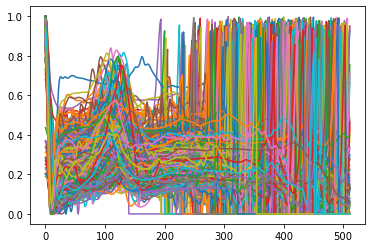

In [15]:
# import matplotlib.pyplot as plt
# for i in range(1000):
#     plt.plot(norm_beats[i][1])
#plt.plot(mi_beats[2000][1])
# plt.plot(mi_beats[2001][1])
# plt.plot(mi_beats[2002][1])
# plt.plot(mi_beats[2003][1])
# plt.plot(mi_beats[2004][1])
# plt.plot(mi_beats[2005][1])
# plt.plot(mi_beats[2006][1])
# plt.plot(mi_beats[2007][1])
# plt.plot(mi_beats[2008][1])
# plt.plot(mi_beats[2009][1])
# plt.plot(mi_beats[2010][1])
# plt.plot(mi_beats[2011][1])
# plt.plot(mi_beats[2012][1])
# plt.plot(mi_beats[2013][1])
# plt.plot(mi_beats[2014][1])
# plt.plot(mi_beats[2015][1])
# plt.plot(mi_beats[2016][1])
# plt.plot(mi_beats[2017][1])
# plt.plot(mi_beats[2018][1])
# plt.plot(mi_beats[2019][1])
#plt.show()
#mi_beats[1][7]

In [15]:
# We are going to make three training and testing sets for each of the models.
# We will then use these datasets to train each of the individual one-vs-one classifiers
# For each of these datasets, we want a balanced of classes, such that a good classifier can be made.
# After, we will then make a 4th dataset to train the meta classifier, without updating the weights of the individual ovo models

from sklearn.utils import shuffle

# Dataset for model 1: MI vs non-MI model

# Separate into train and test set with balanced class labels
model_1_data_train = np.concatenate((mi_beats[0:int(0.8*len(mi_beats))], non_mi_beats[0:int(0.8*len(mi_beats))]))
model_1_data_test = np.concatenate((mi_beats[int(0.8*len(mi_beats)):], non_mi_beats[int(0.8*len(mi_beats)):len(mi_beats)]))

# Class labels: MI - 1, non-MI - 0
mi_label_model_1 = np.ones((4069,1,1))
non_mi_label_model_1 = np.zeros((4069,1,1))

model_1_labels_train = np.concatenate((mi_label_model_1[0:int(0.8*len(mi_beats))], non_mi_label_model_1[0:int(0.8*len(mi_beats))]))
model_1_labels_test = np.concatenate((mi_label_model_1[int(0.8*len(mi_beats)):], non_mi_label_model_1[int(0.8*len(mi_beats)):len(mi_beats)]))

# Shuffle across the first index using the same logic for both the label and the data
model_1_data_train, model_1_labels_train = shuffle(model_1_data_train, model_1_labels_train)
model_1_data_test, model_1_labels_test = shuffle(model_1_data_test, model_1_labels_test)

print(np.shape(model_1_data_train))
print(np.shape(model_1_labels_train))

print(np.shape(model_1_data_test))
print(np.shape(model_1_labels_test))

(6510, 8, 512, 1)
(6510, 1, 1)
(1628, 8, 512, 1)
(1628, 1, 1)


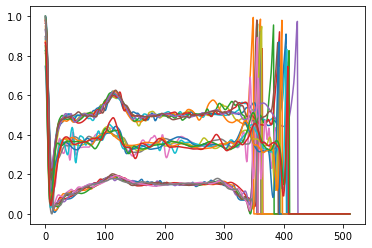

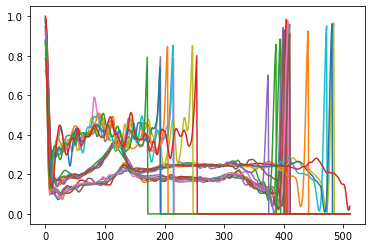

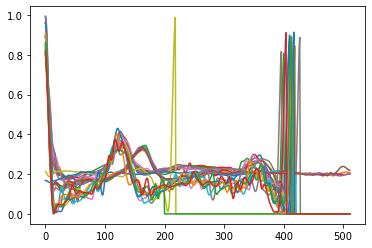

In [16]:
for i in range(3):
    plt.plot(mi_beats[i][0])
    plt.plot(mi_beats[i][1])
    plt.plot(mi_beats[i][2])
    plt.plot(mi_beats[i][3])
    plt.plot(mi_beats[i][4])
    plt.plot(mi_beats[i][5])
    plt.plot(mi_beats[i][6])
    plt.plot(mi_beats[i][7])
plt.show()

for i in range(3):
    plt.plot(non_mi_beats[i][0])
    plt.plot(non_mi_beats[i][1])
    plt.plot(non_mi_beats[i][2])
    plt.plot(non_mi_beats[i][3])
    plt.plot(non_mi_beats[i][4])
    plt.plot(non_mi_beats[i][5])
    plt.plot(non_mi_beats[i][6])
    plt.plot(non_mi_beats[i][7])
plt.show()

for i in range(3):
    plt.plot(norm_beats[i][0])
    plt.plot(norm_beats[i][1])
    plt.plot(norm_beats[i][2])
    plt.plot(norm_beats[i][3])
    plt.plot(norm_beats[i][4])
    plt.plot(norm_beats[i][5])
    plt.plot(norm_beats[i][6])
    plt.plot(norm_beats[i][7])
plt.show()

In [17]:
# Dataset for model 2: MI vs norm model

# Separate into training and testing set
model_2_data_train = np.concatenate((mi_beats[0:int(0.8*len(mi_beats))], norm_beats[0:int(0.8*len(mi_beats))]))
model_2_data_test = np.concatenate((mi_beats[int(0.8*len(mi_beats)):], norm_beats[int(0.8*len(mi_beats)):len(mi_beats)]))

# Class labels: MI - 1, norm - 0
mi_label_model_2 = np.ones((4069,1,1))
norm_label_model_2 = np.zeros((4069,1,1))

model_2_labels_train = np.concatenate((mi_label_model_2[0:int(0.8*len(mi_beats))], norm_label_model_2[0:int(0.8*len(mi_beats))]))
model_2_labels_test = np.concatenate((mi_label_model_2[int(0.8*len(mi_beats)):], norm_label_model_2[int(0.8*len(mi_beats)):len(mi_beats)]))

# Shuffle across the first index using the same logic for both the label and the data
model_2_data_train, model_2_labels_train = shuffle(model_2_data_train, model_2_labels_train)
model_2_data_test, model_2_labels_test = shuffle(model_2_data_test, model_2_labels_test)

print(np.shape(model_2_data_train))
print(np.shape(model_2_labels_train))

print(np.shape(model_2_data_test))
print(np.shape(model_2_labels_test))

(6510, 8, 512, 1)
(6510, 1, 1)
(1628, 8, 512, 1)
(1628, 1, 1)


In [18]:
# Dataset for model 3: non-MI vs norm model

# Separate into training and testing set
model_3_data_train = np.concatenate((non_mi_beats[0:int(0.8*len(non_mi_beats))], norm_beats[0:int(0.8*len(non_mi_beats))]))
model_3_data_test = np.concatenate((non_mi_beats[int(0.8*len(non_mi_beats)):], norm_beats[int(0.8*len(non_mi_beats)):len(non_mi_beats)]))

# Class labels: non-MI - 0, norm - 1
non_mi_label_model_3 = np.zeros((7661,1,1))
norm_label_model_3 = np.ones((7661,1,1))

model_3_labels_train = np.concatenate((non_mi_label_model_3[0:int(0.8*len(non_mi_beats))], norm_label_model_3[0:int(0.8*len(non_mi_beats))]))
model_3_labels_test = np.concatenate((non_mi_label_model_3[int(0.8*len(non_mi_beats)):], norm_label_model_3[int(0.8*len(non_mi_beats)):len(non_mi_beats)]))

# Shuffle across the first index using the same logic for both the label and the data
model_3_data_train, model_3_labels_train = shuffle(model_3_data_train, model_3_labels_train)
model_3_data_test, model_3_labels_test = shuffle(model_3_data_test, model_3_labels_test)

print(np.shape(model_3_data_train))
print(np.shape(model_3_labels_train))

print(np.shape(model_3_data_test))
print(np.shape(model_3_labels_test))

(12256, 8, 512, 1)
(12256, 1, 1)
(3066, 8, 512, 1)
(3066, 1, 1)


In [19]:
from sklearn.utils import shuffle
# Dataset for model 4: meta learner - whole dataset

# Separate into train and test set with balanced class labels
model_4_data_train = np.concatenate((mi_beats[0:int(0.8*len(mi_beats))], non_mi_beats[0:int(0.8*len(mi_beats))], norm_beats[0:int(0.8*len(mi_beats))]))
model_4_data_test = np.concatenate((mi_beats[int(0.8*len(mi_beats)):], non_mi_beats[int(0.8*len(mi_beats)):len(mi_beats)], norm_beats[int(0.8*len(mi_beats)):len(mi_beats)]))

# Class labels: MI - [1,0,0], non-MI - [0,1,0], norm - [0,0,1]
mi_label_model_4 = np.zeros((4069,3))
non_mi_label_model_4 = np.zeros((4069,3))
norm_label_model_4 = np.zeros((4069,3))

for i in range(len(mi_label_model_4)):
    mi_label_model_4[i] = [1,0,0]
    non_mi_label_model_4[i] = [0,1,0]
    norm_label_model_4[i] = [0,0,1]

model_4_labels_train = np.concatenate((mi_label_model_4[0:int(0.8*len(mi_beats))], non_mi_label_model_4[0:int(0.8*len(mi_beats))], norm_label_model_4[0:int(0.8*len(mi_beats))]))
model_4_labels_test = np.concatenate((mi_label_model_4[int(0.8*len(mi_beats)):], non_mi_label_model_4[int(0.8*len(mi_beats)):len(mi_beats)], norm_label_model_4[int(0.8*len(mi_beats)):len(mi_beats)]))

# Shuffle across the first index using the same logic for both the label and the data
model_4_data_train, model_4_labels_train = shuffle(model_4_data_train, model_4_labels_train)
model_4_data_test, model_4_labels_test = shuffle(model_4_data_test, model_4_labels_test)

print(np.shape(model_4_data_train))
print(np.shape(model_4_labels_train))

print(np.shape(model_4_data_test))
print(np.shape(model_4_labels_test))

(9765, 8, 512, 1)
(9765, 3)
(2442, 8, 512, 1)
(2442, 3)


In [20]:
model_4_labels_test[1]

array([0., 1., 0.])

Model 1

In [56]:
import tensorflow as tf

seq_length = 8
beat_length = beat_len
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(16, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(1, activation='softmax')(x)

cnn_lstm_model_1 = tf.keras.Model(input, output, name="cnn_lstm_model_1")
cnn_lstm_model_1.summary()

Model: "cnn_lstm_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8, 512, 1)]       0         
                                                                 
 time_distributed_113 (TimeD  (None, 8, 512, 32)       128       
 istributed)                                                     
                                                                 
 time_distributed_114 (TimeD  (None, 8, 512, 32)       128       
 istributed)                                                     
                                                                 
 time_distributed_115 (TimeD  (None, 8, 512, 32)       3104      
 istributed)                                                     
                                                                 
 time_distributed_116 (TimeD  (None, 8, 512, 32)       128       
 istributed)                                      

In [57]:
cnn_lstm_model_1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [58]:
# Training
cnn_lstm_model_1.fit(x=model_1_data_train, y=model_1_labels_train, validation_data=[model_1_data_test, model_1_labels_test], batch_size=32, epochs=1, verbose=True)

204/204 [==============================] - 85s 383ms/step - loss: 0.9598 - binary_accuracy: 0.5000 - val_loss: 0.6973 - val_binary_accuracy: 0.5000


Model 2

In [25]:
seq_length = 8
beat_length = 345
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(16, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(1, activation='softmax')(x)

cnn_lstm_model_2 = tf.keras.Model(input, output, name="cnn_lstm_model_2")
cnn_lstm_model_2.summary()

Model: "cnn_lstm_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8, 345, 1)]       0         
                                                                 
 time_distributed_84 (TimeDi  (None, 8, 345, 32)       128       
 stributed)                                                      
                                                                 
 time_distributed_85 (TimeDi  (None, 8, 345, 32)       128       
 stributed)                                                      
                                                                 
 time_distributed_86 (TimeDi  (None, 8, 345, 32)       3104      
 stributed)                                                      
                                                                 
 time_distributed_87 (TimeDi  (None, 8, 345, 32)       128       
 stributed)                                       

In [26]:
cnn_lstm_model_2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [27]:
cnn_lstm_model_2.fit(x=model_2_data_train, y=model_2_labels_train, validation_data=[model_2_data_test, model_2_labels_test], batch_size=32, epochs=2, verbose=True)

Epoch 1/2
184/184 [==============================] - 58s 273ms/step - loss: 0.5854 - binary_accuracy: 0.5000 - val_loss: 0.7433 - val_binary_accuracy: 0.5000
Epoch 2/2
184/184 [==============================] - 48s 262ms/step - loss: 0.4632 - binary_accuracy: 0.5000 - val_loss: 0.6859 - val_binary_accuracy: 0.5000


In [30]:
seq_length = 8
beat_length = 345
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(16, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(1, activation='softmax')(x)

cnn_lstm_model_3 = tf.keras.Model(input, output, name="cnn_lstm_model_3")
cnn_lstm_model_3.summary()

Model: "cnn_lstm_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8, 345, 1)]       0         
                                                                 
 time_distributed_140 (TimeD  (None, 8, 345, 32)       128       
 istributed)                                                     
                                                                 
 time_distributed_141 (TimeD  (None, 8, 345, 32)       128       
 istributed)                                                     
                                                                 
 time_distributed_142 (TimeD  (None, 8, 345, 32)       3104      
 istributed)                                                     
                                                                 
 time_distributed_143 (TimeD  (None, 8, 345, 32)       128       
 istributed)                                      

In [32]:
cnn_lstm_model_3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [33]:
cnn_lstm_model_3.fit(x=model_3_data_train, y=model_3_labels_train, validation_data=[model_3_data_test, model_3_labels_test], batch_size=32, epochs=2, verbose=True)

Epoch 1/2
353/353 [==============================] - 98s 258ms/step - loss: 0.5851 - binary_accuracy: 0.5000 - val_loss: 0.5710 - val_binary_accuracy: 0.5000
Epoch 2/2
353/353 [==============================] - 91s 257ms/step - loss: 0.4927 - binary_accuracy: 0.5000 - val_loss: 0.4787 - val_binary_accuracy: 0.5000


In [ ]:
## ORIGINAL HYPERPARAMETERS FROM PAPER
import tensorflow as tf

seq_length = 8
beat_length = 512
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(32, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(3, activation='softmax')(x)

cnn_lstm_model_all = tf.keras.Model(input, output, name="cnn_lstm_model_all")
cnn_lstm_model_all.summary()

In [22]:
cnn_lstm_model_all.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])



In [21]:
import datetime

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
path = ""
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=path,
    save_weights_only=False,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


NameError: name 'tf' is not defined

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [25]:
cnn_lstm_model_all.fit(x=model_4_data_train, y=model_4_labels_train, validation_data=[model_4_data_test, model_4_labels_test], batch_size=32, epochs=50, verbose=True, callbacks=[callback, tensorboard_callback, model_checkpoint_callback])



Epoch 1/50
306/306 [==============================] - 125s 384ms/step - loss: 1.4144 - categorical_accuracy: 0.3594 - val_loss: 1.1183 - val_categorical_accuracy: 0.3333
Epoch 2/50
306/306 [==============================] - 119s 387ms/step - loss: 1.0610 - categorical_accuracy: 0.4470 - val_loss: 0.9970 - val_categorical_accuracy: 0.4787
Epoch 3/50
306/306 [==============================] - 117s 383ms/step - loss: 0.9772 - categorical_accuracy: 0.4897 - val_loss: 0.8989 - val_categorical_accuracy: 0.5401
Epoch 4/50
306/306 [==============================] - 114s 372ms/step - loss: 0.9407 - categorical_accuracy: 0.5167 - val_loss: 1.0305 - val_categorical_accuracy: 0.4611
Epoch 5/50
306/306 [==============================] - 116s 379ms/step - loss: 0.9251 - categorical_accuracy: 0.5226 - val_loss: 0.9574 - val_categorical_accuracy: 0.5119
Epoch 6/50
306/306 [==============================] - 116s 380ms/step - loss: 0.9213 - categorical_accuracy: 0.5341 - val_loss: 0.9379 - val_categoric

In [26]:
cnn_lstm_model_all.save("saved_models/cnn_lstm/model_1")

2022-02-02 18:35:31.636736: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/model_1/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/model_1/assets


In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
model_4_labels_pred = cnn_lstm_model_all.predict(model_4_data_test)
cf_matrix = confusion_matrix(model_4_labels_test, model_4_labels_pred)
sns.heatmap(cf_matrix, annot=True, cmap="Blues")

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [46]:
import tensorflow as tf
new_model = tf.keras.models.load_model("saved_models/cnn_lstm/conv_128_conv_filter_6_pool_size_4_dropout_0.4_dense_16_lstm_128_lr_0.01_opt_Adagrad_batch_size_32")

In [47]:
new_model.predict(model_4_data_test)

array([[0.07337666, 0.04621721, 0.8804061 ],
       [0.07289714, 0.05722819, 0.8698746 ],
       [0.09782227, 0.06707854, 0.83509916],
       ...,
       [0.13956061, 0.15214117, 0.7082982 ],
       [0.1408886 , 0.11195396, 0.7471574 ],
       [0.33557302, 0.32252607, 0.34190091]], dtype=float32)

In [48]:
model_4_labels_test = (model_4_labels_test).astype(int)
model_4_labels_test


array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [49]:
model_4_labels_pred = (model_4_labels_pred == model_4_labels_pred.max(axis=1)[:,None]).astype(int)
model_4_labels_pred

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

MI Sensitivity:  0.7616279069767442
MI Specificity:  0.5595567867036011


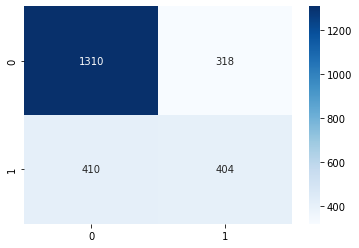

In [50]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
cf_matrix = multilabel_confusion_matrix(model_4_labels_test, model_4_labels_pred)
mi_sens = (cf_matrix[0][0][0])/(cf_matrix[0][0][0]+cf_matrix[0][1][0])
mi_spec = (cf_matrix[0][1][1])/(cf_matrix[0][1][1]+cf_matrix[0][0][1])
sns.heatmap(cf_matrix[0], annot=True, cmap="Blues", fmt='g')
print("MI Sensitivity: ", mi_sens)
print("MI Specificity: ", mi_spec)

Other CVD Sensitivity:  0.6903504560729716
Other CVD Specificity:  0.47075208913649025


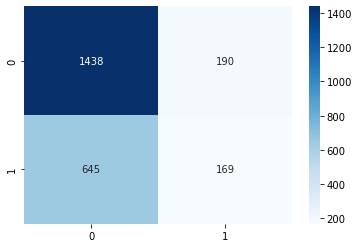

In [51]:
sns.heatmap(cf_matrix[1], annot=True, cmap="Blues", fmt='g')
non_mi_sens = (cf_matrix[1][0][0])/(cf_matrix[1][0][0]+cf_matrix[1][1][0])
non_mi_spec = (cf_matrix[1][1][1])/(cf_matrix[1][1][1]+cf_matrix[1][0][1])
print("Other CVD Sensitivity: ", non_mi_sens)
print("Other CVD Specificity: ", non_mi_spec)

Healthy Sensitivity:  0.9463459759481961
Healthy Specificity:  0.5554739162380602


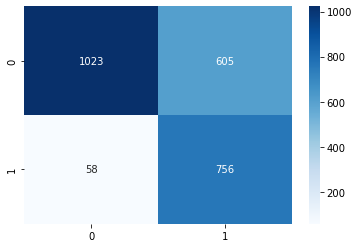

In [52]:
sns.heatmap(cf_matrix[2], annot=True, cmap="Blues", fmt='g')
norm_sens = (cf_matrix[2][0][0])/(cf_matrix[2][0][0]+cf_matrix[2][1][0])
norm_spec = (cf_matrix[2][1][1])/(cf_matrix[2][1][1]+cf_matrix[2][0][1])
print("Healthy Sensitivity: ", norm_sens)
print("Healthy Specificity: ", norm_spec)


Classification Report

              precision    recall  f1-score   support

          MI       0.56      0.50      0.53       814
   Other CVD       0.47      0.21      0.29       814
     Healthy       0.56      0.93      0.70       814

   micro avg       0.54      0.54      0.54      2442
   macro avg       0.53      0.54      0.50      2442
weighted avg       0.53      0.54      0.50      2442
 samples avg       0.54      0.54      0.54      2442



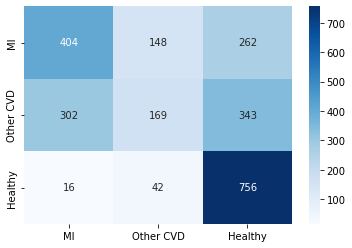

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(model_4_labels_test.argmax(axis=1), model_4_labels_pred.argmax(axis=1))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=['MI', 'Other CVD', 'Healthy'], yticklabels=['MI', 'Other CVD', 'Healthy'])
print('\nClassification Report\n')
print(classification_report(model_4_labels_test, model_4_labels_pred, target_names=['MI', 'Other CVD', 'Healthy']))

In [22]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
## Random search over hyperparameter space
import random
import tensorflow as tf
import datetime
from sklearn.metrics import f1_score

conv_layers = [8,16,32,64,128]
conv_filters = [2,3,6]
pool_sizes = [2,3,4]
dropouts = [0.2,0.3,0.4,0.5]
denses = [8,16,32,64,128]
lstms = [8,16,32,64,128]
lrs = [1e-4, 1e-3, 1e-2, 1e-1] 
opts = ["Adam", "SGD", "RMSProp", "Adagrad"]
batch_sizes = [16,32,64,128,256]
best_model = ""
best_f1 = 0
model_df = pd.DataFrame(columns = ["model_name", "f1_score"])

for i in range(50):
    conv_layer = random.choice(conv_layers)
    conv_filter = random.choice(conv_filters)
    pool_size = random.choice(pool_sizes)
    dropout = random.choice(dropouts)
    dense = random.choice(denses)
    lstm = random.choice(lstms)
    lr = random.choice(lrs)
    opt = random.choice(opts)
    batch_size = random.choice(batch_sizes)
    
    model_name = "conv_" + str(conv_layer) + "_conv_filter_" + str(conv_filter) + "_pool_size_" + str(pool_size) + "_dropout_" + str(dropout) + "_dense_" + str(dense) + "_lstm_" + str(lstm) +  "_lr_" + str(lr) +  "_opt_" + str(opt) +  "_batch_size_" + str(batch_size)
    path = "saved_models/cnn_lstm/" + model_name
    
    seq_length = 8
    beat_length = 512
    num_feats = 1

    ## Layer 0 - input
    input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

    ## Layers 1-6 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(input)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 7-12 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 13-19 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 19-24 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layer 25 - time-distributed flatten
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

    ## Layer 26 - time-distributed dense
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(dense, activation='relu'))(x)

    ## Layer 27 - time-distributed batch norm
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

    ## Layer 28 - time-distributed dropout
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layer 29 - LSTM
    x = tf.keras.layers.LSTM(lstm)(x)

    ## Layer 30 - batch norm
    x = tf.keras.layers.BatchNormalization()(x)

    ## Layer 31 - dropout
    x = tf.keras.layers.Dropout(dropout)(x)

    ## Layer 32 - dense
    x = tf.keras.layers.Dense(dense, activation='relu')(x)

    ## Layer 33 - batch norm
    x = tf.keras.layers.BatchNormalization()(x)

    ## Layer 34 - dropout
    x = tf.keras.layers.Dropout(dropout)(x)

    ## Layer 35 - output
    output = tf.keras.layers.Dense(3, activation='softmax')(x)

    cnn_lstm_model_all = tf.keras.Model(input, output, name=model_name)
    #cnn_lstm_model_all.summary()
    
    if opt == "Adam":
        opt_ = tf.keras.optimizers.Adam(learning_rate=lr)
    elif opt == "SGD":
        opt_ = tf.keras.optimizers.SGD(learning_rate=lr)
    elif opt == "RMSProp":
        opt_ = tf.keras.optimizers.RMSprop(learning_rate=lr)
    elif opt == "Adagrad":
        opt_ = tf.keras.optimizers.Adagrad(learning_rate=lr)
    
    cnn_lstm_model_all.compile(optimizer=opt_, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=path,
        save_weights_only=False,
        monitor='val_loss',
        mode='max',
        save_best_only=True)
    
    print(" ----------------------- CURRENTLY TRAINING MODEL ------------------------- ")
    print(model_name)
    cnn_lstm_model_all.fit(x=model_4_data_train, y=model_4_labels_train, validation_data=[model_4_data_test, model_4_labels_test], batch_size=batch_size, epochs=100, verbose=True, callbacks=[callback, tensorboard_callback, model_checkpoint_callback])
    
    model_4_labels_pred = cnn_lstm_model_all.predict(model_4_data_test)
    model_4_labels_test_score = (model_4_labels_test).astype(int)
    model_4_labels_pred_score = (model_4_labels_pred == model_4_labels_pred.max(axis=1)[:,None]).astype(int)
    f1 = f1_score(model_4_labels_test_score, model_4_labels_pred_score, average="macro")
    if f1 > best_f1:
        best_model = model_name
        best_f1 = f1
    print(" ----------------------- CURRENT BEST MODEL ------------------------- ")
    print(best_model)
    print("F1 SCORE: " + str(best_f1))
    to_add = [model_name,f1]
    model_df = model_df.append(pd.Series(to_add, index=["model_name","f1_score"]), ignore_index=True)
    model_df.to_csv("saved_models/cnn_lstm/training_results_2.csv")
    
    

2022-02-09 19:07:12.301426: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_64_conv_filter_6_pool_size_2_dropout_0.2_dense_32_lstm_128_lr_0.01_opt_Adagrad_batch_size_32
Epoch 1/100
306/306 [==============================] - ETA: 0s - loss: 1.0994 - categorical_accuracy: 0.4655 - auc: 0.6608 - precision: 0.5006 - recall: 0.3537

2022-02-09 19:11:59.662027: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_6_pool_size_2_dropout_0.2_dense_32_lstm_128_lr_0.01_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_6_pool_size_2_dropout_0.2_dense_32_lstm_128_lr_0.01_opt_Adagrad_batch_size_32/assets


306/306 [==============================] - 295s 945ms/step - loss: 1.0994 - categorical_accuracy: 0.4655 - auc: 0.6608 - precision: 0.5006 - recall: 0.3537 - val_loss: 1.1156 - val_categorical_accuracy: 0.3554 - val_auc: 0.5763 - val_precision: 0.5022 - val_recall: 0.0954
Epoch 2/100
306/306 [==============================] - 272s 891ms/step - loss: 0.9361 - categorical_accuracy: 0.5380 - auc: 0.7400 - precision: 0.5861 - recall: 0.4102 - val_loss: 0.8978 - val_categorical_accuracy: 0.5594 - val_auc: 0.7628 - val_precision: 0.6386 - val_recall: 0.4103
Epoch 4/100
306/306 [==============================] - 278s 907ms/step - loss: 0.9045 - categorical_accuracy: 0.5538 - auc: 0.7578 - precision: 0.6097 - recall: 0.4300 - val_loss: 0.9190 - val_categorical_accuracy: 0.5622 - val_auc: 0.7578 - val_precision: 0.6195 - val_recall: 0.4414
Epoch 5/100
306/306 [==============================] - 278s 908ms/step - loss: 0.8938 - categorical_accuracy: 0.5590 - auc: 0.7634 - precision: 0.6137 - reca

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_6_pool_size_2_dropout_0.2_dense_32_lstm_128_lr_0.01_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_6_pool_size_2_dropout_0.2_dense_32_lstm_128_lr_0.01_opt_Adagrad_batch_size_32/assets


306/306 [==============================] - 295s 964ms/step - loss: 0.8531 - categorical_accuracy: 0.5946 - auc: 0.7873 - precision: 0.6486 - recall: 0.4852 - val_loss: 1.1269 - val_categorical_accuracy: 0.4365 - val_auc: 0.6350 - val_precision: 0.4833 - val_recall: 0.3190
Epoch 11/100
306/306 [==============================] - 271s 885ms/step - loss: 0.8515 - categorical_accuracy: 0.5899 - auc: 0.7875 - precision: 0.6479 - recall: 0.4811 - val_loss: 0.9053 - val_categorical_accuracy: 0.5729 - val_auc: 0.7668 - val_precision: 0.6141 - val_recall: 0.4971
Epoch 12/100
306/306 [==============================] - 277s 907ms/step - loss: 0.8405 - categorical_accuracy: 0.5941 - auc: 0.7935 - precision: 0.6506 - recall: 0.4866 - val_loss: 0.8683 - val_categorical_accuracy: 0.5819 - val_auc: 0.7806 - val_precision: 0.6338 - val_recall: 0.4848
Epoch 13/100
306/306 [==============================] - 276s 901ms/step - loss: 0.8349 - categorical_accuracy: 0.6026 - auc: 0.7968 - precision: 0.6556 - r

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.001_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.001_opt_Adagrad_batch_size_32/assets


306/306 [==============================] - 81s 248ms/step - loss: 1.7851 - categorical_accuracy: 0.3373 - auc_1: 0.5038 - precision_1: 0.3362 - recall_1: 0.2880 - val_loss: 1.1326 - val_categorical_accuracy: 0.3309 - val_auc_1: 0.4916 - val_precision_1: 0.2727 - val_recall_1: 0.0025
Epoch 2/100
306/306 [==============================] - ETA: 0s - loss: 1.6573 - categorical_accuracy: 0.3458 - auc_1: 0.5138 - precision_1: 0.3504 - recall_1: 0.2926

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.001_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.001_opt_Adagrad_batch_size_32/assets


306/306 [==============================] - 76s 247ms/step - loss: 1.6573 - categorical_accuracy: 0.3458 - auc_1: 0.5138 - precision_1: 0.3504 - recall_1: 0.2926 - val_loss: 1.2582 - val_categorical_accuracy: 0.3346 - val_auc_1: 0.5044 - val_precision_1: 0.3409 - val_recall_1: 0.1962
Epoch 3/100
306/306 [==============================] - 61s 201ms/step - loss: 1.5953 - categorical_accuracy: 0.3521 - auc_1: 0.5224 - precision_1: 0.3508 - recall_1: 0.2938 - val_loss: 1.2576 - val_categorical_accuracy: 0.3321 - val_auc_1: 0.5016 - val_precision_1: 0.3299 - val_recall_1: 0.1966
Epoch 4/100
306/306 [==============================] - 59s 192ms/step - loss: 1.5696 - categorical_accuracy: 0.3544 - auc_1: 0.5228 - precision_1: 0.3561 - recall_1: 0.2922 - val_loss: 1.2444 - val_categorical_accuracy: 0.3256 - val_auc_1: 0.5017 - val_precision_1: 0.3313 - val_recall_1: 0.1986
Epoch 5/100
306/306 [==============================] - 59s 193ms/step - loss: 1.5640 - categorical_accuracy: 0.3545 - auc_1:

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_2_dropout_0.2_dense_64_lstm_32_lr_0.01_opt_Adam_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_2_dropout_0.2_dense_64_lstm_32_lr_0.01_opt_Adam_batch_size_64/assets


153/153 [==============================] - 136s 856ms/step - loss: 1.0685 - categorical_accuracy: 0.4600 - auc_2: 0.6549 - precision_2: 0.5076 - recall_2: 0.2825 - val_loss: 1.1224 - val_categorical_accuracy: 0.3481 - val_auc_2: 0.5563 - val_precision_2: 0.4492 - val_recall_2: 0.2027
Epoch 2/100
153/153 [==============================] - 109s 713ms/step - loss: 0.9461 - categorical_accuracy: 0.5135 - auc_2: 0.7254 - precision_2: 0.5890 - recall_2: 0.3287 - val_loss: 1.0755 - val_categorical_accuracy: 0.4087 - val_auc_2: 0.6264 - val_precision_2: 0.5228 - val_recall_2: 0.2674
Epoch 3/100
153/153 [==============================] - 108s 707ms/step - loss: 0.9086 - categorical_accuracy: 0.5326 - auc_2: 0.7480 - precision_2: 0.6000 - recall_2: 0.3739 - val_loss: 0.9865 - val_categorical_accuracy: 0.4738 - val_auc_2: 0.6993 - val_precision_2: 0.5471 - val_recall_2: 0.3280
Epoch 4/100
153/153 [==============================] - 115s 753ms/step - loss: 0.8959 - categorical_accuracy: 0.5466 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 63s 1s/step - loss: 1.6862 - categorical_accuracy: 0.3292 - auc_3: 0.4946 - precision_3: 0.3276 - recall_3: 0.2626 - val_loss: 1.1041 - val_categorical_accuracy: 0.3374 - val_auc_3: 0.4981 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 1.6559 - categorical_accuracy: 0.3364 - auc_3: 0.5018 - precision_3: 0.3373 - recall_3: 0.2686

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 54s 1s/step - loss: 1.6559 - categorical_accuracy: 0.3364 - auc_3: 0.5018 - precision_3: 0.3373 - recall_3: 0.2686 - val_loss: 1.1112 - val_categorical_accuracy: 0.3333 - val_auc_3: 0.5051 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 1.6172 - categorical_accuracy: 0.3373 - auc_3: 0.5055 - precision_3: 0.3376 - recall_3: 0.2641

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 57s 1s/step - loss: 1.6172 - categorical_accuracy: 0.3373 - auc_3: 0.5055 - precision_3: 0.3376 - recall_3: 0.2641 - val_loss: 1.1218 - val_categorical_accuracy: 0.3333 - val_auc_3: 0.5050 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss: 1.5890 - categorical_accuracy: 0.3364 - auc_3: 0.5056 - precision_3: 0.3364 - recall_3: 0.2625

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 55s 1s/step - loss: 1.5890 - categorical_accuracy: 0.3364 - auc_3: 0.5056 - precision_3: 0.3364 - recall_3: 0.2625 - val_loss: 1.1395 - val_categorical_accuracy: 0.3333 - val_auc_3: 0.5003 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 5/100
39/39 [==============================] - ETA: 0s - loss: 1.5843 - categorical_accuracy: 0.3345 - auc_3: 0.5057 - precision_3: 0.3397 - recall_3: 0.2627

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 57s 1s/step - loss: 1.5843 - categorical_accuracy: 0.3345 - auc_3: 0.5057 - precision_3: 0.3397 - recall_3: 0.2627 - val_loss: 1.1652 - val_categorical_accuracy: 0.3333 - val_auc_3: 0.4951 - val_precision_3: 0.3110 - val_recall_3: 0.2432
Epoch 6/100
39/39 [==============================] - ETA: 0s - loss: 1.5749 - categorical_accuracy: 0.3316 - auc_3: 0.5029 - precision_3: 0.3358 - recall_3: 0.2587

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 57s 1s/step - loss: 1.5749 - categorical_accuracy: 0.3316 - auc_3: 0.5029 - precision_3: 0.3358 - recall_3: 0.2587 - val_loss: 1.1879 - val_categorical_accuracy: 0.3333 - val_auc_3: 0.4961 - val_precision_3: 0.3308 - val_recall_3: 0.3153
Epoch 7/100
39/39 [==============================] - ETA: 0s - loss: 1.5536 - categorical_accuracy: 0.3378 - auc_3: 0.5063 - precision_3: 0.3386 - recall_3: 0.2598

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 56s 1s/step - loss: 1.5536 - categorical_accuracy: 0.3378 - auc_3: 0.5063 - precision_3: 0.3386 - recall_3: 0.2598 - val_loss: 1.2150 - val_categorical_accuracy: 0.3329 - val_auc_3: 0.4967 - val_precision_3: 0.3311 - val_recall_3: 0.3198
Epoch 8/100
39/39 [==============================] - ETA: 0s - loss: 1.5484 - categorical_accuracy: 0.3370 - auc_3: 0.5004 - precision_3: 0.3380 - recall_3: 0.2545

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 57s 1s/step - loss: 1.5484 - categorical_accuracy: 0.3370 - auc_3: 0.5004 - precision_3: 0.3380 - recall_3: 0.2545 - val_loss: 1.2371 - val_categorical_accuracy: 0.3309 - val_auc_3: 0.5137 - val_precision_3: 0.3284 - val_recall_3: 0.3100
Epoch 9/100
39/39 [==============================] - ETA: 0s - loss: 1.5113 - categorical_accuracy: 0.3336 - auc_3: 0.5064 - precision_3: 0.3363 - recall_3: 0.2514

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_16_lstm_32_lr_0.001_opt_SGD_batch_size_256/assets


39/39 [==============================] - 55s 1s/step - loss: 1.5113 - categorical_accuracy: 0.3336 - auc_3: 0.5064 - precision_3: 0.3363 - recall_3: 0.2514 - val_loss: 1.2653 - val_categorical_accuracy: 0.3309 - val_auc_3: 0.5116 - val_precision_3: 0.3309 - val_recall_3: 0.3219
Epoch 10/100
39/39 [==============================] - 41s 1s/step - loss: 1.4908 - categorical_accuracy: 0.3385 - auc_3: 0.5113 - precision_3: 0.3479 - recall_3: 0.2577 - val_loss: 1.2573 - val_categorical_accuracy: 0.3350 - val_auc_3: 0.5104 - val_precision_3: 0.3273 - val_recall_3: 0.2940
Epoch 11/100
39/39 [==============================] - 41s 1s/step - loss: 1.4899 - categorical_accuracy: 0.3396 - auc_3: 0.5062 - precision_3: 0.3394 - recall_3: 0.2495 - val_loss: 1.2475 - val_categorical_accuracy: 0.3362 - val_auc_3: 0.5096 - val_precision_3: 0.3276 - val_recall_3: 0.2789
Epoch 00011: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_64_conv_filter_6_pool_size_2_drop

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_128_conv_filter_2_pool_size_2_dropout_0.4_dense_64_lstm_128_lr_0.0001_opt_SGD_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_128_conv_filter_2_pool_size_2_dropout_0.4_dense_64_lstm_128_lr_0.0001_opt_SGD_batch_size_16/assets


611/611 [==============================] - 497s 804ms/step - loss: 1.7543 - categorical_accuracy: 0.3425 - auc_4: 0.5081 - precision_4: 0.3459 - recall_4: 0.2970 - val_loss: 1.4051 - val_categorical_accuracy: 0.3391 - val_auc_4: 0.5252 - val_precision_4: 0.3497 - val_recall_4: 0.3124
Epoch 2/100
611/611 [==============================] - 472s 773ms/step - loss: 1.7186 - categorical_accuracy: 0.3436 - auc_4: 0.5085 - precision_4: 0.3456 - recall_4: 0.2964 - val_loss: 1.2277 - val_categorical_accuracy: 0.3661 - val_auc_4: 0.5413 - val_precision_4: 0.3844 - val_recall_4: 0.2580
Epoch 3/100
611/611 [==============================] - 488s 799ms/step - loss: 1.6166 - categorical_accuracy: 0.3516 - auc_4: 0.5228 - precision_4: 0.3521 - recall_4: 0.2959 - val_loss: 1.9035 - val_categorical_accuracy: 0.3333 - val_auc_4: 0.5336 - val_precision_4: 0.3336 - val_recall_4: 0.3333
Epoch 5/100
611/611 [==============================] - ETA: 0s - loss: 1.6218 - categorical_accuracy: 0.3541 - auc_4: 0.5

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_128_conv_filter_2_pool_size_2_dropout_0.4_dense_64_lstm_128_lr_0.0001_opt_SGD_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_128_conv_filter_2_pool_size_2_dropout_0.4_dense_64_lstm_128_lr_0.0001_opt_SGD_batch_size_16/assets


611/611 [==============================] - 487s 797ms/step - loss: 1.6218 - categorical_accuracy: 0.3541 - auc_4: 0.5208 - precision_4: 0.3544 - recall_4: 0.2960 - val_loss: 2.0099 - val_categorical_accuracy: 0.3329 - val_auc_4: 0.5215 - val_precision_4: 0.3346 - val_recall_4: 0.3329
Epoch 6/100
611/611 [==============================] - 471s 771ms/step - loss: 1.5593 - categorical_accuracy: 0.3639 - auc_4: 0.5357 - precision_4: 0.3682 - recall_4: 0.3033 - val_loss: 1.7903 - val_categorical_accuracy: 0.3337 - val_auc_4: 0.5318 - val_precision_4: 0.3347 - val_recall_4: 0.3329
Epoch 7/100
611/611 [==============================] - 489s 801ms/step - loss: 1.5291 - categorical_accuracy: 0.3609 - auc_4: 0.5390 - precision_4: 0.3682 - recall_4: 0.3031 - val_loss: 1.8710 - val_categorical_accuracy: 0.3337 - val_auc_4: 0.5544 - val_precision_4: 0.3339 - val_recall_4: 0.3333
Epoch 8/100
611/611 [==============================] - 474s 776ms/step - loss: 1.4840 - categorical_accuracy: 0.3697 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.2_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.2_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_16/assets


611/611 [==============================] - 149s 235ms/step - loss: 1.0187 - categorical_accuracy: 0.4786 - auc_5: 0.6765 - precision_5: 0.5512 - recall_5: 0.2471 - val_loss: 0.9759 - val_categorical_accuracy: 0.4824 - val_auc_5: 0.7012 - val_precision_5: 0.5911 - val_recall_5: 0.2125
Epoch 2/100
611/611 [==============================] - 127s 208ms/step - loss: 0.9549 - categorical_accuracy: 0.5126 - auc_5: 0.7218 - precision_5: 0.6005 - recall_5: 0.2843 - val_loss: 0.9236 - val_categorical_accuracy: 0.5336 - val_auc_5: 0.7402 - val_precision_5: 0.5974 - val_recall_5: 0.3907
Epoch 3/100
611/611 [==============================] - 128s 209ms/step - loss: 0.9452 - categorical_accuracy: 0.5228 - auc_5: 0.7282 - precision_5: 0.6084 - recall_5: 0.3041 - val_loss: 0.9524 - val_categorical_accuracy: 0.4898 - val_auc_5: 0.7183 - val_precision_5: 0.5222 - val_recall_5: 0.3374
Epoch 4/100
611/611 [==============================] - 128s 210ms/step - loss: 0.9423 - categorical_accuracy: 0.5183 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.2_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.2_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_16/assets


611/611 [==============================] - 140s 229ms/step - loss: 0.9358 - categorical_accuracy: 0.5250 - auc_5: 0.7325 - precision_5: 0.6074 - recall_5: 0.3218 - val_loss: 0.9822 - val_categorical_accuracy: 0.4881 - val_auc_5: 0.7160 - val_precision_5: 0.5756 - val_recall_5: 0.2977
Epoch 7/100
611/611 [==============================] - 126s 206ms/step - loss: 0.9301 - categorical_accuracy: 0.5300 - auc_5: 0.7366 - precision_5: 0.6131 - recall_5: 0.3280 - val_loss: 0.9498 - val_categorical_accuracy: 0.4836 - val_auc_5: 0.7158 - val_precision_5: 0.6301 - val_recall_5: 0.2281
Epoch 8/100
611/611 [==============================] - 126s 206ms/step - loss: 0.9303 - categorical_accuracy: 0.5258 - auc_5: 0.7363 - precision_5: 0.6056 - recall_5: 0.3259 - val_loss: 0.9050 - val_categorical_accuracy: 0.5438 - val_auc_5: 0.7507 - val_precision_5: 0.6103 - val_recall_5: 0.3989
Epoch 9/100
611/611 [==============================] - 125s 204ms/step - loss: 0.9215 - categorical_accuracy: 0.5249 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_6_pool_size_3_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_6_pool_size_3_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_16/assets


611/611 [==============================] - 143s 224ms/step - loss: 1.1422 - categorical_accuracy: 0.3742 - auc_6: 0.5521 - precision_6: 0.4142 - recall_6: 0.1150 - val_loss: 1.1654 - val_categorical_accuracy: 0.3362 - val_auc_6: 0.5145 - val_precision_6: 0.3423 - val_recall_6: 0.3124
Epoch 2/100
611/611 [==============================] - ETA: 0s - loss: 1.0836 - categorical_accuracy: 0.3922 - auc_6: 0.5831 - precision_6: 0.4453 - recall_6: 0.0738

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_6_pool_size_3_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_6_pool_size_3_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_16/assets


611/611 [==============================] - 132s 216ms/step - loss: 1.0836 - categorical_accuracy: 0.3922 - auc_6: 0.5831 - precision_6: 0.4453 - recall_6: 0.0738 - val_loss: 1.1658 - val_categorical_accuracy: 0.3333 - val_auc_6: 0.5241 - val_precision_6: 0.3440 - val_recall_6: 0.3301
Epoch 3/100
611/611 [==============================] - ETA: 0s - loss: 1.0693 - categorical_accuracy: 0.4137 - auc_6: 0.6022 - precision_6: 0.4843 - recall_6: 0.0852

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_6_pool_size_3_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_6_pool_size_3_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_16/assets


611/611 [==============================] - 131s 214ms/step - loss: 1.0693 - categorical_accuracy: 0.4137 - auc_6: 0.6022 - precision_6: 0.4843 - recall_6: 0.0852 - val_loss: 1.2354 - val_categorical_accuracy: 0.3423 - val_auc_6: 0.5758 - val_precision_6: 0.3609 - val_recall_6: 0.3321
Epoch 4/100
611/611 [==============================] - 117s 191ms/step - loss: 1.0155 - categorical_accuracy: 0.4594 - auc_6: 0.6695 - precision_6: 0.5614 - recall_6: 0.1887 - val_loss: 1.0008 - val_categorical_accuracy: 0.4697 - val_auc_6: 0.6850 - val_precision_6: 0.5287 - val_recall_6: 0.3542
Epoch 5/100
611/611 [==============================] - 116s 189ms/step - loss: 0.9808 - categorical_accuracy: 0.4881 - auc_6: 0.7013 - precision_6: 0.5884 - recall_6: 0.2506 - val_loss: 0.9936 - val_categorical_accuracy: 0.4889 - val_auc_6: 0.7046 - val_precision_6: 0.5310 - val_recall_6: 0.3407
Epoch 6/100
611/611 [==============================] - 112s 184ms/step - loss: 0.9625 - categorical_accuracy: 0.5042 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_32_lr_0.001_opt_RMSProp_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_32_lr_0.001_opt_RMSProp_batch_size_128/assets


77/77 [==============================] - 67s 792ms/step - loss: 1.5650 - categorical_accuracy: 0.3601 - auc_7: 0.5190 - precision_7: 0.3586 - recall_7: 0.2684 - val_loss: 1.1337 - val_categorical_accuracy: 0.3333 - val_auc_7: 0.4981 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 2/100
77/77 [==============================] - 43s 563ms/step - loss: 1.2908 - categorical_accuracy: 0.3791 - auc_7: 0.5458 - precision_7: 0.4011 - recall_7: 0.2100 - val_loss: 1.1307 - val_categorical_accuracy: 0.3333 - val_auc_7: 0.5122 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/100
77/77 [==============================] - 42s 553ms/step - loss: 1.1667 - categorical_accuracy: 0.4005 - auc_7: 0.5749 - precision_7: 0.4395 - recall_7: 0.1481 - val_loss: 1.1094 - val_categorical_accuracy: 0.3333 - val_auc_7: 0.5508 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 4/100
77/77 [==============================] - 43s 561ms/step - loss: 1.1066 - categorical_accuracy:

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_6_pool_size_4_dropout_0.3_dense_128_lstm_32_lr_0.1_opt_SGD_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_6_pool_size_4_dropout_0.3_dense_128_lstm_32_lr_0.1_opt_SGD_batch_size_16/assets


611/611 [==============================] - 132s 208ms/step - loss: 1.3036 - categorical_accuracy: 0.3571 - auc_8: 0.5323 - precision_8: 0.3686 - recall_8: 0.2357 - val_loss: 1.4597 - val_categorical_accuracy: 0.2895 - val_auc_8: 0.4909 - val_precision_8: 0.3148 - val_recall_8: 0.2314
Epoch 2/100
611/611 [==============================] - 108s 176ms/step - loss: 1.1903 - categorical_accuracy: 0.3670 - auc_8: 0.5450 - precision_8: 0.3791 - recall_8: 0.1874 - val_loss: 1.1220 - val_categorical_accuracy: 0.3845 - val_auc_8: 0.5432 - val_precision_8: 0.4408 - val_recall_8: 0.1204
Epoch 3/100
611/611 [==============================] - 110s 180ms/step - loss: 1.1340 - categorical_accuracy: 0.3808 - auc_8: 0.5634 - precision_8: 0.4008 - recall_8: 0.1629 - val_loss: 1.3306 - val_categorical_accuracy: 0.3477 - val_auc_8: 0.5219 - val_precision_8: 0.3521 - val_recall_8: 0.3378
Epoch 4/100
611/611 [==============================] - 110s 181ms/step - loss: 1.1063 - categorical_accuracy: 0.3930 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.2_dense_64_lstm_32_lr_0.1_opt_Adam_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.2_dense_64_lstm_32_lr_0.1_opt_Adam_batch_size_16/assets


611/611 [==============================] - 130s 204ms/step - loss: 1.2269 - categorical_accuracy: 0.3357 - auc_9: 0.5034 - precision_9: 0.3403 - recall_9: 0.1295 - val_loss: 1.1871 - val_categorical_accuracy: 0.3333 - val_auc_9: 0.5020 - val_precision_9: 0.4080 - val_recall_9: 0.0209
Epoch 2/100
611/611 [==============================] - ETA: 0s - loss: 1.1970 - categorical_accuracy: 0.3345 - auc_9: 0.5035 - precision_9: 0.3345 - recall_9: 0.1244

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.2_dense_64_lstm_32_lr_0.1_opt_Adam_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.2_dense_64_lstm_32_lr_0.1_opt_Adam_batch_size_16/assets


611/611 [==============================] - 123s 201ms/step - loss: 1.1970 - categorical_accuracy: 0.3345 - auc_9: 0.5035 - precision_9: 0.3345 - recall_9: 0.1244 - val_loss: 1.1957 - val_categorical_accuracy: 0.3333 - val_auc_9: 0.4895 - val_precision_9: 0.3333 - val_recall_9: 0.3333
Epoch 3/100
611/611 [==============================] - 111s 182ms/step - loss: 1.1996 - categorical_accuracy: 0.3323 - auc_9: 0.5025 - precision_9: 0.3366 - recall_9: 0.1279 - val_loss: 1.1449 - val_categorical_accuracy: 0.3333 - val_auc_9: 0.4992 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 4/100
611/611 [==============================] - 110s 179ms/step - loss: 1.1994 - categorical_accuracy: 0.3397 - auc_9: 0.5068 - precision_9: 0.3350 - recall_9: 0.1319 - val_loss: 1.1115 - val_categorical_accuracy: 0.3333 - val_auc_9: 0.5010 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 5/100
611/611 [==============================] - 111s 181ms/step - loss: 1.1887 - categorical_accur

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.2_dense_64_lstm_32_lr_0.1_opt_Adam_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.2_dense_64_lstm_32_lr_0.1_opt_Adam_batch_size_16/assets


611/611 [==============================] - 126s 206ms/step - loss: 1.2028 - categorical_accuracy: 0.3256 - auc_9: 0.4898 - precision_9: 0.3205 - recall_9: 0.1130 - val_loss: 1.3901 - val_categorical_accuracy: 0.3333 - val_auc_9: 0.5000 - val_precision_9: 0.3333 - val_recall_9: 0.3333
Epoch 8/100
611/611 [==============================] - 110s 180ms/step - loss: 1.2125 - categorical_accuracy: 0.3361 - auc_9: 0.5017 - precision_9: 0.3278 - recall_9: 0.1362 - val_loss: 1.1061 - val_categorical_accuracy: 0.3333 - val_auc_9: 0.5000 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 9/100
611/611 [==============================] - 109s 178ms/step - loss: 1.1854 - categorical_accuracy: 0.3278 - auc_9: 0.4968 - precision_9: 0.3246 - recall_9: 0.1007 - val_loss: 1.2481 - val_categorical_accuracy: 0.3333 - val_auc_9: 0.5001 - val_precision_9: 0.3333 - val_recall_9: 0.3333
Epoch 10/100
611/611 [==============================] - ETA: 0s - loss: 1.1836 - categorical_accuracy: 0.3333 - a

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.2_dense_64_lstm_32_lr_0.1_opt_Adam_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.2_dense_64_lstm_32_lr_0.1_opt_Adam_batch_size_16/assets


611/611 [==============================] - 125s 205ms/step - loss: 1.1836 - categorical_accuracy: 0.3333 - auc_9: 0.5014 - precision_9: 0.3301 - recall_9: 0.1074 - val_loss: 261.0871 - val_categorical_accuracy: 0.3329 - val_auc_9: 0.5006 - val_precision_9: 0.3329 - val_recall_9: 0.3329
Epoch 11/100
611/611 [==============================] - 106s 174ms/step - loss: 1.1995 - categorical_accuracy: 0.3299 - auc_9: 0.4961 - precision_9: 0.3205 - recall_9: 0.1161 - val_loss: 95.0918 - val_categorical_accuracy: 0.3292 - val_auc_9: 0.4957 - val_precision_9: 0.3027 - val_recall_9: 0.1429
Epoch 12/100
611/611 [==============================] - 110s 180ms/step - loss: 1.1901 - categorical_accuracy: 0.3433 - auc_9: 0.5105 - precision_9: 0.3461 - recall_9: 0.1344 - val_loss: 1.0897 - val_categorical_accuracy: 0.3857 - val_auc_9: 0.5579 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 13/100
611/611 [==============================] - 111s 181ms/step - loss: 1.1972 - categorical_accurac

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 52s 608ms/step - loss: 1.8215 - categorical_accuracy: 0.3351 - auc_10: 0.5034 - precision_10: 0.3355 - recall_10: 0.2883 - val_loss: 1.1020 - val_categorical_accuracy: 0.3333 - val_auc_10: 0.5047 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/100
77/77 [==============================] - ETA: 0s - loss: 1.8095 - categorical_accuracy: 0.3392 - auc_10: 0.5043 - precision_10: 0.3394 - recall_10: 0.2898

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 48s 624ms/step - loss: 1.8095 - categorical_accuracy: 0.3392 - auc_10: 0.5043 - precision_10: 0.3394 - recall_10: 0.2898 - val_loss: 1.1136 - val_categorical_accuracy: 0.3260 - val_auc_10: 0.4840 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 3/100
77/77 [==============================] - ETA: 0s - loss: 1.7871 - categorical_accuracy: 0.3362 - auc_10: 0.5069 - precision_10: 0.3390 - recall_10: 0.2890

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 47s 617ms/step - loss: 1.7871 - categorical_accuracy: 0.3362 - auc_10: 0.5069 - precision_10: 0.3390 - recall_10: 0.2890 - val_loss: 1.1265 - val_categorical_accuracy: 0.3346 - val_auc_10: 0.4906 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 4/100
77/77 [==============================] - ETA: 0s - loss: 1.7700 - categorical_accuracy: 0.3362 - auc_10: 0.5071 - precision_10: 0.3381 - recall_10: 0.2885

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 46s 604ms/step - loss: 1.7700 - categorical_accuracy: 0.3362 - auc_10: 0.5071 - precision_10: 0.3381 - recall_10: 0.2885 - val_loss: 1.1270 - val_categorical_accuracy: 0.3198 - val_auc_10: 0.4870 - val_precision_10: 0.3404 - val_recall_10: 0.0066
Epoch 5/100
77/77 [==============================] - ETA: 0s - loss: 1.8035 - categorical_accuracy: 0.3315 - auc_10: 0.4990 - precision_10: 0.3324 - recall_10: 0.2849

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 48s 629ms/step - loss: 1.8035 - categorical_accuracy: 0.3315 - auc_10: 0.4990 - precision_10: 0.3324 - recall_10: 0.2849 - val_loss: 1.1449 - val_categorical_accuracy: 0.3219 - val_auc_10: 0.4887 - val_precision_10: 0.3258 - val_recall_10: 0.0295
Epoch 6/100
77/77 [==============================] - ETA: 0s - loss: 1.7819 - categorical_accuracy: 0.3371 - auc_10: 0.5044 - precision_10: 0.3407 - recall_10: 0.2888

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 46s 595ms/step - loss: 1.7819 - categorical_accuracy: 0.3371 - auc_10: 0.5044 - precision_10: 0.3407 - recall_10: 0.2888 - val_loss: 1.1782 - val_categorical_accuracy: 0.3407 - val_auc_10: 0.4981 - val_precision_10: 0.3359 - val_recall_10: 0.0721
Epoch 7/100
77/77 [==============================] - ETA: 0s - loss: 1.7653 - categorical_accuracy: 0.3420 - auc_10: 0.5065 - precision_10: 0.3421 - recall_10: 0.2916

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 48s 624ms/step - loss: 1.7653 - categorical_accuracy: 0.3420 - auc_10: 0.5065 - precision_10: 0.3421 - recall_10: 0.2916 - val_loss: 1.1927 - val_categorical_accuracy: 0.3411 - val_auc_10: 0.5030 - val_precision_10: 0.3428 - val_recall_10: 0.1183
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.7597 - categorical_accuracy: 0.3356 - auc_10: 0.5053 - precision_10: 0.3369 - recall_10: 0.2861

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 47s 615ms/step - loss: 1.7597 - categorical_accuracy: 0.3356 - auc_10: 0.5053 - precision_10: 0.3369 - recall_10: 0.2861 - val_loss: 1.2152 - val_categorical_accuracy: 0.3395 - val_auc_10: 0.5045 - val_precision_10: 0.3417 - val_recall_10: 0.1446
Epoch 9/100
77/77 [==============================] - ETA: 0s - loss: 1.7763 - categorical_accuracy: 0.3339 - auc_10: 0.5010 - precision_10: 0.3328 - recall_10: 0.2846

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 46s 603ms/step - loss: 1.7763 - categorical_accuracy: 0.3339 - auc_10: 0.5010 - precision_10: 0.3328 - recall_10: 0.2846 - val_loss: 1.2363 - val_categorical_accuracy: 0.3428 - val_auc_10: 0.5037 - val_precision_10: 0.3475 - val_recall_10: 0.1740
Epoch 10/100
77/77 [==============================] - ETA: 0s - loss: 1.7721 - categorical_accuracy: 0.3377 - auc_10: 0.5047 - precision_10: 0.3348 - recall_10: 0.2856

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 48s 624ms/step - loss: 1.7721 - categorical_accuracy: 0.3377 - auc_10: 0.5047 - precision_10: 0.3348 - recall_10: 0.2856 - val_loss: 1.2528 - val_categorical_accuracy: 0.3370 - val_auc_10: 0.4999 - val_precision_10: 0.3411 - val_recall_10: 0.1847
Epoch 11/100
77/77 [==============================] - ETA: 0s - loss: 1.7797 - categorical_accuracy: 0.3328 - auc_10: 0.4986 - precision_10: 0.3296 - recall_10: 0.2804

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_4_dropout_0.4_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 46s 599ms/step - loss: 1.7797 - categorical_accuracy: 0.3328 - auc_10: 0.4986 - precision_10: 0.3296 - recall_10: 0.2804 - val_loss: 1.2907 - val_categorical_accuracy: 0.3460 - val_auc_10: 0.5006 - val_precision_10: 0.3367 - val_recall_10: 0.2056
Epoch 00011: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_64_conv_filter_6_pool_size_2_dropout_0.2_dense_32_lstm_128_lr_0.01_opt_Adagrad_batch_size_32
F1 SCORE: 0.5910850810285401
 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_32_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_64
Epoch 1/100
153/153 [==============================] - ETA: 0s - loss: 1.7317 - categorical_accuracy: 0.3372 - auc_11: 0.5056 - precision_11: 0.3369 - recall_11: 0.2860

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_64/assets


153/153 [==============================] - 95s 577ms/step - loss: 1.7317 - categorical_accuracy: 0.3372 - auc_11: 0.5056 - precision_11: 0.3369 - recall_11: 0.2860 - val_loss: 1.1571 - val_categorical_accuracy: 0.3333 - val_auc_11: 0.4938 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 2/100
153/153 [==============================] - ETA: 0s - loss: 1.7188 - categorical_accuracy: 0.3392 - auc_11: 0.5084 - precision_11: 0.3427 - recall_11: 0.2913

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_64/assets


153/153 [==============================] - 89s 580ms/step - loss: 1.7188 - categorical_accuracy: 0.3392 - auc_11: 0.5084 - precision_11: 0.3427 - recall_11: 0.2913 - val_loss: 1.2639 - val_categorical_accuracy: 0.3309 - val_auc_11: 0.5002 - val_precision_11: 0.3390 - val_recall_11: 0.2948
Epoch 3/100
153/153 [==============================] - ETA: 0s - loss: 1.7223 - categorical_accuracy: 0.3343 - auc_11: 0.5023 - precision_11: 0.3320 - recall_11: 0.2814

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_32_lr_0.0001_opt_Adagrad_batch_size_64/assets


153/153 [==============================] - 90s 591ms/step - loss: 1.7223 - categorical_accuracy: 0.3343 - auc_11: 0.5023 - precision_11: 0.3320 - recall_11: 0.2814 - val_loss: 1.6288 - val_categorical_accuracy: 0.3321 - val_auc_11: 0.5130 - val_precision_11: 0.3383 - val_recall_11: 0.3137
Epoch 4/100
153/153 [==============================] - 74s 483ms/step - loss: 1.6847 - categorical_accuracy: 0.3388 - auc_11: 0.5102 - precision_11: 0.3388 - recall_11: 0.2851 - val_loss: 1.5376 - val_categorical_accuracy: 0.3460 - val_auc_11: 0.5201 - val_precision_11: 0.3571 - val_recall_11: 0.2977
Epoch 5/100
153/153 [==============================] - 77s 501ms/step - loss: 1.6824 - categorical_accuracy: 0.3421 - auc_11: 0.5134 - precision_11: 0.3445 - recall_11: 0.2890 - val_loss: 1.3719 - val_categorical_accuracy: 0.3464 - val_auc_11: 0.5195 - val_precision_11: 0.3556 - val_recall_11: 0.2576
Epoch 6/100
153/153 [==============================] - 73s 475ms/step - loss: 1.6456 - categorical_accurac

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_2_dropout_0.2_dense_128_lstm_8_lr_0.1_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_2_dropout_0.2_dense_128_lstm_8_lr_0.1_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 64s 766ms/step - loss: 1.1750 - categorical_accuracy: 0.4240 - auc_12: 0.6050 - precision_12: 0.4538 - recall_12: 0.2654 - val_loss: 1.0998 - val_categorical_accuracy: 0.3333 - val_auc_12: 0.5169 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 2/100
77/77 [==============================] - 44s 573ms/step - loss: 0.9854 - categorical_accuracy: 0.4861 - auc_12: 0.7011 - precision_12: 0.5548 - recall_12: 0.3149 - val_loss: 1.0986 - val_categorical_accuracy: 0.3387 - val_auc_12: 0.5336 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 3/100
77/77 [==============================] - 45s 588ms/step - loss: 0.9554 - categorical_accuracy: 0.5039 - auc_12: 0.7204 - precision_12: 0.5750 - recall_12: 0.3382 - val_loss: 1.0774 - val_categorical_accuracy: 0.4238 - val_auc_12: 0.5951 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 4/100
77/77 [==============================] - 45s 584ms/step - loss: 0.9366 - cat

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_4_dropout_0.2_dense_32_lstm_128_lr_0.1_opt_SGD_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_4_dropout_0.2_dense_32_lstm_128_lr_0.1_opt_SGD_batch_size_64/assets


153/153 [==============================] - 147s 926ms/step - loss: 1.0663 - categorical_accuracy: 0.4583 - auc_13: 0.6544 - precision_13: 0.5095 - recall_13: 0.2728 - val_loss: 1.1111 - val_categorical_accuracy: 0.3403 - val_auc_13: 0.5017 - val_precision_13: 0.0769 - val_recall_13: 8.1900e-04
Epoch 2/100
153/153 [==============================] - ETA: 0s - loss: 0.9235 - categorical_accuracy: 0.5279 - auc_13: 0.7410 - precision_13: 0.6037 - recall_13: 0.3403

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_4_dropout_0.2_dense_32_lstm_128_lr_0.1_opt_SGD_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_4_dropout_0.2_dense_32_lstm_128_lr_0.1_opt_SGD_batch_size_64/assets


153/153 [==============================] - 140s 913ms/step - loss: 0.9235 - categorical_accuracy: 0.5279 - auc_13: 0.7410 - precision_13: 0.6037 - recall_13: 0.3403 - val_loss: 1.1612 - val_categorical_accuracy: 0.3370 - val_auc_13: 0.5007 - val_precision_13: 0.2879 - val_recall_13: 0.1011
Epoch 3/100
153/153 [==============================] - 129s 845ms/step - loss: 0.9019 - categorical_accuracy: 0.5391 - auc_13: 0.7537 - precision_13: 0.6119 - recall_13: 0.3666 - val_loss: 0.9817 - val_categorical_accuracy: 0.4996 - val_auc_13: 0.6991 - val_precision_13: 0.6406 - val_recall_13: 0.2285
Epoch 4/100
153/153 [==============================] - 122s 801ms/step - loss: 0.8887 - categorical_accuracy: 0.5505 - auc_13: 0.7622 - precision_13: 0.6139 - recall_13: 0.3998 - val_loss: 0.9458 - val_categorical_accuracy: 0.5061 - val_auc_13: 0.7276 - val_precision_13: 0.5841 - val_recall_13: 0.3514
Epoch 5/100
153/153 [==============================] - 124s 811ms/step - loss: 0.8823 - categorical_acc

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 82s 2s/step - loss: 1.6442 - categorical_accuracy: 0.3394 - auc_14: 0.5062 - precision_14: 0.3429 - recall_14: 0.2632 - val_loss: 1.0990 - val_categorical_accuracy: 0.3333 - val_auc_14: 0.4999 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 1.4811 - categorical_accuracy: 0.3480 - auc_14: 0.5172 - precision_14: 0.3527 - recall_14: 0.2421

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 75s 2s/step - loss: 1.4811 - categorical_accuracy: 0.3480 - auc_14: 0.5172 - precision_14: 0.3527 - recall_14: 0.2421 - val_loss: 1.0995 - val_categorical_accuracy: 0.3333 - val_auc_14: 0.5000 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 1.3899 - categorical_accuracy: 0.3534 - auc_14: 0.5219 - precision_14: 0.3536 - recall_14: 0.2150

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 77s 2s/step - loss: 1.3899 - categorical_accuracy: 0.3534 - auc_14: 0.5219 - precision_14: 0.3536 - recall_14: 0.2150 - val_loss: 1.0997 - val_categorical_accuracy: 0.3321 - val_auc_14: 0.5020 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss: 1.3196 - categorical_accuracy: 0.3481 - auc_14: 0.5212 - precision_14: 0.3593 - recall_14: 0.1963

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 75s 2s/step - loss: 1.3196 - categorical_accuracy: 0.3481 - auc_14: 0.5212 - precision_14: 0.3593 - recall_14: 0.1963 - val_loss: 1.0997 - val_categorical_accuracy: 0.3264 - val_auc_14: 0.5029 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 5/100
39/39 [==============================] - ETA: 0s - loss: 1.2615 - categorical_accuracy: 0.3557 - auc_14: 0.5270 - precision_14: 0.3610 - recall_14: 0.1691

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 77s 2s/step - loss: 1.2615 - categorical_accuracy: 0.3557 - auc_14: 0.5270 - precision_14: 0.3610 - recall_14: 0.1691 - val_loss: 1.1014 - val_categorical_accuracy: 0.3075 - val_auc_14: 0.4791 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 6/100
39/39 [==============================] - ETA: 0s - loss: 1.2379 - categorical_accuracy: 0.3530 - auc_14: 0.5246 - precision_14: 0.3690 - recall_14: 0.1536

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 76s 2s/step - loss: 1.2379 - categorical_accuracy: 0.3530 - auc_14: 0.5246 - precision_14: 0.3690 - recall_14: 0.1536 - val_loss: 1.1018 - val_categorical_accuracy: 0.2875 - val_auc_14: 0.4757 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 7/100
39/39 [==============================] - ETA: 0s - loss: 1.2060 - categorical_accuracy: 0.3540 - auc_14: 0.5285 - precision_14: 0.3686 - recall_14: 0.1321

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 76s 2s/step - loss: 1.2060 - categorical_accuracy: 0.3540 - auc_14: 0.5285 - precision_14: 0.3686 - recall_14: 0.1321 - val_loss: 1.1025 - val_categorical_accuracy: 0.3333 - val_auc_14: 0.5004 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 8/100
39/39 [==============================] - ETA: 0s - loss: 1.1832 - categorical_accuracy: 0.3586 - auc_14: 0.5336 - precision_14: 0.3788 - recall_14: 0.1136

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 77s 2s/step - loss: 1.1832 - categorical_accuracy: 0.3586 - auc_14: 0.5336 - precision_14: 0.3788 - recall_14: 0.1136 - val_loss: 1.1029 - val_categorical_accuracy: 0.3333 - val_auc_14: 0.5049 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 9/100
39/39 [==============================] - ETA: 0s - loss: 1.1577 - categorical_accuracy: 0.3682 - auc_14: 0.5426 - precision_14: 0.3921 - recall_14: 0.1007

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 76s 2s/step - loss: 1.1577 - categorical_accuracy: 0.3682 - auc_14: 0.5426 - precision_14: 0.3921 - recall_14: 0.1007 - val_loss: 1.1033 - val_categorical_accuracy: 0.3333 - val_auc_14: 0.5067 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 10/100
39/39 [==============================] - ETA: 0s - loss: 1.1525 - categorical_accuracy: 0.3561 - auc_14: 0.5329 - precision_14: 0.3760 - recall_14: 0.0804

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 77s 2s/step - loss: 1.1525 - categorical_accuracy: 0.3561 - auc_14: 0.5329 - precision_14: 0.3760 - recall_14: 0.0804 - val_loss: 1.1051 - val_categorical_accuracy: 0.3333 - val_auc_14: 0.5072 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 11/100
39/39 [==============================] - ETA: 0s - loss: 1.1264 - categorical_accuracy: 0.3675 - auc_14: 0.5490 - precision_14: 0.4121 - recall_14: 0.0761

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_SGD_batch_size_256/assets


39/39 [==============================] - 75s 2s/step - loss: 1.1264 - categorical_accuracy: 0.3675 - auc_14: 0.5490 - precision_14: 0.4121 - recall_14: 0.0761 - val_loss: 1.1073 - val_categorical_accuracy: 0.3333 - val_auc_14: 0.5089 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 00011: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_64_conv_filter_6_pool_size_2_dropout_0.2_dense_32_lstm_128_lr_0.01_opt_Adagrad_batch_size_32
F1 SCORE: 0.5910850810285401
 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256
Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 1.1634 - categorical_accuracy: 0.4392 - auc_15: 0.6216 - precision_15: 0.4705 - recall_15: 0.2960

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256/assets


39/39 [==============================] - 93s 2s/step - loss: 1.1634 - categorical_accuracy: 0.4392 - auc_15: 0.6216 - precision_15: 0.4705 - recall_15: 0.2960 - val_loss: 1.1548 - val_categorical_accuracy: 0.3333 - val_auc_15: 0.5498 - val_precision_15: 0.5000 - val_recall_15: 4.0950e-04
Epoch 2/100
39/39 [==============================] - 70s 2s/step - loss: 0.9263 - categorical_accuracy: 0.5201 - auc_15: 0.7371 - precision_15: 0.5914 - recall_15: 0.3604 - val_loss: 0.9750 - val_categorical_accuracy: 0.4775 - val_auc_15: 0.7039 - val_precision_15: 0.5974 - val_recall_15: 0.2461
Epoch 3/100
39/39 [==============================] - 72s 2s/step - loss: 0.9047 - categorical_accuracy: 0.5380 - auc_15: 0.7521 - precision_15: 0.6121 - recall_15: 0.3722 - val_loss: 0.9904 - val_categorical_accuracy: 0.4550 - val_auc_15: 0.6806 - val_precision_15: 0.5214 - val_recall_15: 0.1847
Epoch 4/100
39/39 [==============================] - 71s 2s/step - loss: 0.8730 - categorical_accuracy: 0.5716 - auc_

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256/assets


39/39 [==============================] - 86s 2s/step - loss: 0.8748 - categorical_accuracy: 0.5666 - auc_15: 0.7721 - precision_15: 0.6251 - recall_15: 0.4399 - val_loss: 1.1898 - val_categorical_accuracy: 0.4169 - val_auc_15: 0.6110 - val_precision_15: 0.4446 - val_recall_15: 0.3071
Epoch 6/100
39/39 [==============================] - ETA: 0s - loss: 0.8543 - categorical_accuracy: 0.5816 - auc_15: 0.7841 - precision_15: 0.6461 - recall_15: 0.4558

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256/assets


39/39 [==============================] - 89s 2s/step - loss: 0.8543 - categorical_accuracy: 0.5816 - auc_15: 0.7841 - precision_15: 0.6461 - recall_15: 0.4558 - val_loss: 1.1917 - val_categorical_accuracy: 0.4337 - val_auc_15: 0.6299 - val_precision_15: 0.4916 - val_recall_15: 0.3227
Epoch 7/100
39/39 [==============================] - 71s 2s/step - loss: 0.8489 - categorical_accuracy: 0.5883 - auc_15: 0.7871 - precision_15: 0.6452 - recall_15: 0.4742 - val_loss: 1.0737 - val_categorical_accuracy: 0.4361 - val_auc_15: 0.6413 - val_precision_15: 0.5102 - val_recall_15: 0.2961
Epoch 8/100
39/39 [==============================] - ETA: 0s - loss: 0.8454 - categorical_accuracy: 0.5931 - auc_15: 0.7890 - precision_15: 0.6497 - recall_15: 0.4695

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.3_dense_64_lstm_128_lr_0.01_opt_Adam_batch_size_256/assets


39/39 [==============================] - 86s 2s/step - loss: 0.8454 - categorical_accuracy: 0.5931 - auc_15: 0.7890 - precision_15: 0.6497 - recall_15: 0.4695 - val_loss: 1.6173 - val_categorical_accuracy: 0.3829 - val_auc_15: 0.5725 - val_precision_15: 0.3859 - val_recall_15: 0.3374
Epoch 9/100
39/39 [==============================] - 70s 2s/step - loss: 0.8404 - categorical_accuracy: 0.6006 - auc_15: 0.7935 - precision_15: 0.6577 - recall_15: 0.4776 - val_loss: 1.1627 - val_categorical_accuracy: 0.4779 - val_auc_15: 0.6636 - val_precision_15: 0.4896 - val_recall_15: 0.4349
Epoch 10/100
39/39 [==============================] - 73s 2s/step - loss: 0.8289 - categorical_accuracy: 0.6059 - auc_15: 0.7983 - precision_15: 0.6596 - recall_15: 0.5038 - val_loss: 1.0152 - val_categorical_accuracy: 0.4996 - val_auc_15: 0.6899 - val_precision_15: 0.5446 - val_recall_15: 0.4152
Epoch 11/100
39/39 [==============================] - 72s 2s/step - loss: 0.8346 - categorical_accuracy: 0.6060 - auc_15

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


611/611 [==============================] - 187s 296ms/step - loss: 1.1978 - categorical_accuracy: 0.3344 - auc_16: 0.5039 - precision_16: 0.3475 - recall_16: 0.1118 - val_loss: 1.5755 - val_categorical_accuracy: 0.3333 - val_auc_16: 0.4897 - val_precision_16: 0.3343 - val_recall_16: 0.3317
Epoch 2/100
611/611 [==============================] - 163s 267ms/step - loss: 1.1695 - categorical_accuracy: 0.3368 - auc_16: 0.5067 - precision_16: 0.3338 - recall_16: 0.0942 - val_loss: 1.2015 - val_categorical_accuracy: 0.3554 - val_auc_16: 0.5281 - val_precision_16: 0.3837 - val_recall_16: 0.1102
Epoch 3/100
611/611 [==============================] - ETA: 0s - loss: 1.1709 - categorical_accuracy: 0.3250 - auc_16: 0.4956 - precision_16: 0.3309 - recall_16: 0.0836

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


611/611 [==============================] - 178s 291ms/step - loss: 1.1709 - categorical_accuracy: 0.3250 - auc_16: 0.4956 - precision_16: 0.3309 - recall_16: 0.0836 - val_loss: 1.6323 - val_categorical_accuracy: 0.3333 - val_auc_16: 0.4980 - val_precision_16: 0.3333 - val_recall_16: 0.3333
Epoch 4/100
611/611 [==============================] - 162s 265ms/step - loss: 1.1643 - categorical_accuracy: 0.3439 - auc_16: 0.5142 - precision_16: 0.3678 - recall_16: 0.1066 - val_loss: 1.2446 - val_categorical_accuracy: 0.3415 - val_auc_16: 0.5244 - val_precision_16: 0.3479 - val_recall_16: 0.2600
Epoch 5/100
611/611 [==============================] - ETA: 0s - loss: 1.1683 - categorical_accuracy: 0.3422 - auc_16: 0.5043 - precision_16: 0.3299 - recall_16: 0.0851

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


611/611 [==============================] - 178s 292ms/step - loss: 1.1683 - categorical_accuracy: 0.3422 - auc_16: 0.5043 - precision_16: 0.3299 - recall_16: 0.0851 - val_loss: 1.7607 - val_categorical_accuracy: 0.3333 - val_auc_16: 0.5060 - val_precision_16: 0.3337 - val_recall_16: 0.3329
Epoch 6/100
611/611 [==============================] - 163s 266ms/step - loss: 1.1632 - categorical_accuracy: 0.3384 - auc_16: 0.5036 - precision_16: 0.3401 - recall_16: 0.0826 - val_loss: 1.7287 - val_categorical_accuracy: 0.3444 - val_auc_16: 0.5090 - val_precision_16: 0.3492 - val_recall_16: 0.3190
Epoch 7/100
611/611 [==============================] - 163s 267ms/step - loss: 1.1624 - categorical_accuracy: 0.3429 - auc_16: 0.5097 - precision_16: 0.3505 - recall_16: 0.0927 - val_loss: 1.1414 - val_categorical_accuracy: 0.3104 - val_auc_16: 0.4792 - val_precision_16: 0.0000e+00 - val_recall_16: 0.0000e+00
Epoch 8/100
611/611 [==============================] - ETA: 0s - loss: 1.1630 - categorical_acc

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


611/611 [==============================] - 183s 299ms/step - loss: 1.1630 - categorical_accuracy: 0.3368 - auc_16: 0.5087 - precision_16: 0.3508 - recall_16: 0.0870 - val_loss: 41.1458 - val_categorical_accuracy: 0.3378 - val_auc_16: 0.5015 - val_precision_16: 0.3350 - val_recall_16: 0.3317
Epoch 9/100
611/611 [==============================] - 160s 263ms/step - loss: 1.1645 - categorical_accuracy: 0.3317 - auc_16: 0.5028 - precision_16: 0.3315 - recall_16: 0.0809 - val_loss: 1.4184 - val_categorical_accuracy: 0.3333 - val_auc_16: 0.5135 - val_precision_16: 0.3333 - val_recall_16: 0.3333
Epoch 10/100
611/611 [==============================] - 163s 266ms/step - loss: 1.1633 - categorical_accuracy: 0.3465 - auc_16: 0.5077 - precision_16: 0.3552 - recall_16: 0.0952 - val_loss: 1.4316 - val_categorical_accuracy: 0.3333 - val_auc_16: 0.4940 - val_precision_16: 0.3333 - val_recall_16: 0.3333
Epoch 11/100
611/611 [==============================] - 164s 268ms/step - loss: 1.1653 - categorical_

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_64_conv_filter_2_pool_size_3_dropout_0.2_dense_32_lstm_64_lr_0.1_opt_RMSProp_batch_size_16/assets


611/611 [==============================] - 181s 297ms/step - loss: 1.1630 - categorical_accuracy: 0.3373 - auc_16: 0.5016 - precision_16: 0.3313 - recall_16: 0.0786 - val_loss: 4360.9062 - val_categorical_accuracy: 0.3333 - val_auc_16: 0.5000 - val_precision_16: 0.3333 - val_recall_16: 0.3333
Epoch 13/100
611/611 [==============================] - 162s 265ms/step - loss: 1.1627 - categorical_accuracy: 0.3371 - auc_16: 0.5052 - precision_16: 0.3459 - recall_16: 0.0829 - val_loss: 70.9205 - val_categorical_accuracy: 0.3407 - val_auc_16: 0.5069 - val_precision_16: 0.3838 - val_recall_16: 0.2056
Epoch 14/100
611/611 [==============================] - 160s 262ms/step - loss: 1.1671 - categorical_accuracy: 0.3347 - auc_16: 0.4986 - precision_16: 0.3307 - recall_16: 0.0812 - val_loss: 1.5465 - val_categorical_accuracy: 0.3329 - val_auc_16: 0.5032 - val_precision_16: 0.3329 - val_recall_16: 0.3329
Epoch 15/100
611/611 [==============================] - 162s 265ms/step - loss: 1.1688 - categori

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_64_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_64_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 53s 625ms/step - loss: 2.0716 - categorical_accuracy: 0.3355 - auc_17: 0.5024 - precision_17: 0.3345 - recall_17: 0.2990 - val_loss: 1.1309 - val_categorical_accuracy: 0.3333 - val_auc_17: 0.4968 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 2/100
77/77 [==============================] - ETA: 0s - loss: 2.0572 - categorical_accuracy: 0.3363 - auc_17: 0.4993 - precision_17: 0.3367 - recall_17: 0.3019

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_64_lr_0.0001_opt_Adagrad_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_64_lr_0.0001_opt_Adagrad_batch_size_128/assets


77/77 [==============================] - 48s 623ms/step - loss: 2.0572 - categorical_accuracy: 0.3363 - auc_17: 0.4993 - precision_17: 0.3367 - recall_17: 0.3019 - val_loss: 1.1694 - val_categorical_accuracy: 0.3333 - val_auc_17: 0.4915 - val_precision_17: 0.3333 - val_recall_17: 0.3333
Epoch 3/100
77/77 [==============================] - 34s 442ms/step - loss: 2.0422 - categorical_accuracy: 0.3370 - auc_17: 0.5015 - precision_17: 0.3350 - recall_17: 0.3008 - val_loss: 1.1656 - val_categorical_accuracy: 0.3333 - val_auc_17: 0.4873 - val_precision_17: 0.3307 - val_recall_17: 0.2080
Epoch 4/100
77/77 [==============================] - 33s 426ms/step - loss: 2.0213 - categorical_accuracy: 0.3355 - auc_17: 0.5016 - precision_17: 0.3356 - recall_17: 0.2994 - val_loss: 1.1495 - val_categorical_accuracy: 0.3333 - val_auc_17: 0.4857 - val_precision_17: 0.3074 - val_recall_17: 0.0356
Epoch 5/100
77/77 [==============================] - 33s 431ms/step - loss: 1.9958 - categorical_accuracy: 0.343

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


39/39 [==============================] - 49s 1s/step - loss: 1.2509 - categorical_accuracy: 0.3318 - auc_18: 0.4952 - precision_18: 0.3208 - recall_18: 0.1137 - val_loss: 1.0989 - val_categorical_accuracy: 0.3333 - val_auc_18: 0.5000 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 1.1064 - categorical_accuracy: 0.3569 - auc_18: 0.5351 - precision_18: 0.3787 - recall_18: 0.0288

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


39/39 [==============================] - 42s 1s/step - loss: 1.1064 - categorical_accuracy: 0.3569 - auc_18: 0.5351 - precision_18: 0.3787 - recall_18: 0.0288 - val_loss: 1.1000 - val_categorical_accuracy: 0.3333 - val_auc_18: 0.5073 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 1.0846 - categorical_accuracy: 0.3929 - auc_18: 0.5723 - precision_18: 0.4663 - recall_18: 0.0241

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


39/39 [==============================] - 42s 1s/step - loss: 1.0846 - categorical_accuracy: 0.3929 - auc_18: 0.5723 - precision_18: 0.4663 - recall_18: 0.0241 - val_loss: 1.1029 - val_categorical_accuracy: 0.3333 - val_auc_18: 0.5002 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss: 1.0640 - categorical_accuracy: 0.4158 - auc_18: 0.6119 - precision_18: 0.4795 - recall_18: 0.0383

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


39/39 [==============================] - 44s 1s/step - loss: 1.0640 - categorical_accuracy: 0.4158 - auc_18: 0.6119 - precision_18: 0.4795 - recall_18: 0.0383 - val_loss: 1.1080 - val_categorical_accuracy: 0.3333 - val_auc_18: 0.5015 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 5/100
39/39 [==============================] - 27s 697ms/step - loss: 1.0477 - categorical_accuracy: 0.4359 - auc_18: 0.6356 - precision_18: 0.5315 - recall_18: 0.0700 - val_loss: 1.0953 - val_categorical_accuracy: 0.3505 - val_auc_18: 0.5447 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 6/100
39/39 [==============================] - ETA: 0s - loss: 1.0244 - categorical_accuracy: 0.4605 - auc_18: 0.6614 - precision_18: 0.5654 - recall_18: 0.1134

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


39/39 [==============================] - 41s 1s/step - loss: 1.0244 - categorical_accuracy: 0.4605 - auc_18: 0.6614 - precision_18: 0.5654 - recall_18: 0.1134 - val_loss: 1.1181 - val_categorical_accuracy: 0.3333 - val_auc_18: 0.5467 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 7/100
39/39 [==============================] - 28s 709ms/step - loss: 1.0037 - categorical_accuracy: 0.4757 - auc_18: 0.6799 - precision_18: 0.5741 - recall_18: 0.1432 - val_loss: 1.1028 - val_categorical_accuracy: 0.3120 - val_auc_18: 0.4879 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 8/100
39/39 [==============================] - ETA: 0s - loss: 0.9984 - categorical_accuracy: 0.4780 - auc_18: 0.6851 - precision_18: 0.5673 - recall_18: 0.1744

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.1_opt_SGD_batch_size_256/assets


39/39 [==============================] - 43s 1s/step - loss: 0.9984 - categorical_accuracy: 0.4780 - auc_18: 0.6851 - precision_18: 0.5673 - recall_18: 0.1744 - val_loss: 1.1190 - val_categorical_accuracy: 0.3321 - val_auc_18: 0.4999 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 9/100
39/39 [==============================] - 28s 717ms/step - loss: 0.9918 - categorical_accuracy: 0.4851 - auc_18: 0.6915 - precision_18: 0.5761 - recall_18: 0.1933 - val_loss: 1.0671 - val_categorical_accuracy: 0.3833 - val_auc_18: 0.6241 - val_precision_18: 0.5310 - val_recall_18: 0.2453
Epoch 10/100
39/39 [==============================] - 27s 689ms/step - loss: 0.9885 - categorical_accuracy: 0.4937 - auc_18: 0.6967 - precision_18: 0.5832 - recall_18: 0.1859 - val_loss: 1.0499 - val_categorical_accuracy: 0.4251 - val_auc_18: 0.6412 - val_precision_18: 0.5014 - val_recall_18: 0.2875
Epoch 11/100
39/39 [==============================] - 27s 705ms/step - loss: 0.9851 - categorical_accuracy

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_16_lr_0.001_opt_SGD_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.3_dense_128_lstm_16_lr_0.001_opt_SGD_batch_size_32/assets


306/306 [==============================] - 76s 232ms/step - loss: 1.6168 - categorical_accuracy: 0.3273 - auc_19: 0.4976 - precision_19: 0.3271 - recall_19: 0.2639 - val_loss: 1.2031 - val_categorical_accuracy: 0.3321 - val_auc_19: 0.4831 - val_precision_19: 0.3270 - val_recall_19: 0.1421
Epoch 2/100
306/306 [==============================] - 53s 172ms/step - loss: 1.4274 - categorical_accuracy: 0.3372 - auc_19: 0.5045 - precision_19: 0.3365 - recall_19: 0.2456 - val_loss: 1.1968 - val_categorical_accuracy: 0.3321 - val_auc_19: 0.4976 - val_precision_19: 0.3432 - val_recall_19: 0.1425
Epoch 3/100
306/306 [==============================] - 53s 174ms/step - loss: 1.3525 - categorical_accuracy: 0.3416 - auc_19: 0.5105 - precision_19: 0.3405 - recall_19: 0.2297 - val_loss: 1.1305 - val_categorical_accuracy: 0.3894 - val_auc_19: 0.5545 - val_precision_19: 0.3916 - val_recall_19: 0.1458
Epoch 4/100
306/306 [==============================] - 50s 164ms/step - loss: 1.3356 - categorical_accurac